# Lending Club Case Study

### Lending Club is a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
#### 1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
#### 2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
#Importing relevant libraries for our analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 999)

In [2]:
#Reading the loan.csv file

loan=pd.read_csv('loan.csv')

In [3]:
#Checking the head of the loan df

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#Checking the loan info and shape of the dataframe
print(loan.info())
print(loan.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [5]:
# Checking the loan date with describe method to have an idea about the values in the variables

loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Data Cleaning 
# Our first task will be to identify the Data quality issues and clean the data to be ready for our analysis further

### We will work on the data cleaning in the following ways:
1. Fix rows and columns
2. Fix missing values
3. Standardise values
4. Fix invalid values
5. Filter data

In [6]:
'''But we have a lot of columns with missing values, so lets identify and drop the columns with more 
than 70% missing values and then remove the columns as per the business understanding'''

#Check missing values percentage to identify the missing values

loan.isna().sum()/len(loan.index)*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
#Dropping rows with 70% missing values

set1=loan.columns
loan=loan.dropna(thresh=len(loan)*0.3,axis=1)
set2=loan.columns

#Maintaining a dropped_column dataframe to identify the columns that we have dropped during our analysis

dropped_columns=set1.difference(set2).to_frame(name='Column Name',index=False)
dropped_columns['Reason']='Dropped due to high number of missing values'
print("\033[1m Total Columns deleted with high missing values- \033[0m {0} ".format(len(dropped_columns)))


 Total Columns deleted with high missing values-  56 



#### Dropping the below columns as these are generated after the loan was generated and this data is not available at the time of loan application and hence will not help us in determining if user defaults in the loan :

'funded_amnt','funded_amnt_inv','out_prncp','out_prncp_inv','revol_bal','total_pymnt','total_pymnt_inv',
'total_rec_int','total_rec_late_fee','total_rec_prncp','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
'collection_recovery_fee','recoveries','revol_util','mths_since_last_delinq'


In [8]:
#Droppping the identified fields

loan.drop(labels=['funded_amnt_inv','out_prncp','out_prncp_inv','revol_bal','total_pymnt','total_pymnt_inv',
'total_rec_int','total_rec_late_fee','total_rec_prncp','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
'collection_recovery_fee','recoveries','revol_util','mths_since_last_delinq'],inplace=True,axis=1)

#Adding the dropped columns to dropped_columns dataframe
drop_columns_new=pd.DataFrame({'Column Name': ['funded_amnt_inv','out_prncp','out_prncp_inv','revol_bal','total_pymnt','total_pymnt_inv',
'total_rec_int','total_rec_late_fee','total_rec_prncp','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d',
'collection_recovery_fee','recoveries','revol_util','mths_since_last_delinq'], 'Reason': ['Data irrelevant for analysis - generated after loan was created']*16})

dropped_columns=dropped_columns.append(drop_columns_new,ignore_index=True)

In [9]:
'''DROPPING COLUMNS WITH ONLY ONE UNIQUE VALUE'''

#We will not be able to infer anything from a column which has only one unique value, so dropping those columns

for col in loan.columns:
    if((loan[col].nunique()==1)):
        dropped_columns=dropped_columns.append({'Column Name':col,'Reason':"Only one Unique value in the column"},
                                               ignore_index=True)
        loan.drop(col,inplace=True, axis=1)
    

In [10]:
''' Dropping member id, id and url as these are unique id's assigned by lending club for the loan and will not
    help in our analysis '''

#Dropping the fields
loan.drop(['id','member_id','url'],axis=1,inplace=True)

#Adding the fields to the dropped_columns df
dropped_columns.append(pd.DataFrame({'Column Name':['id','member_id','url'],'Reason':['Unique Id\'s not relevant to our analysis']*3}),
                       ignore_index=True)

,Column Name,Reason
0,acc_open_past_24mths,Dropped due to high number of missing values
1,all_util,Dropped due to high number of missing values
2,annual_inc_joint,Dropped due to high number of missing values
3,avg_cur_bal,Dropped due to high number of missing values
4,bc_open_to_buy,Dropped due to high number of missing values
...,...,...
79,delinq_amnt,Only one Unique value in the column
80,tax_liens,Only one Unique value in the column
81,id,Unique Id's not relevant to our analysis
82,member_id,Unique Id's not relevant to our analysis


In [11]:
#Dropping Title and Desc since these are similar to column 'purpose'

loan.drop(labels=['title','desc'],axis=1,inplace=True)
drop_columns_new=pd.DataFrame({'Column Name': ['title','desc'], 'Reason': ['title is similar to purpose column','desc is similar to purpose column']})
dropped_columns=dropped_columns.append(drop_columns_new,ignore_index=True)

In [12]:
display(loan.emp_title.nunique())
len(loan[~loan.emp_title.isna()])


28820

37258

In [13]:
#Since the title column has too many unique categorical values, we will ignore this column for our analysis

loan.drop('emp_title',inplace=True,axis=1)

#Adding the same to dropped column list

dropped_columns=dropped_columns.append({'Column Name':'emp_title','Reason': 'Too many unique categorical values'}
                                       ,ignore_index=True)
                                        

In [14]:
#Setting col width to maximum
pd.set_option('display.max_colwidth', -1)

#Checking the columns and their description

loan_dictionary=pd.read_excel("Data_Dictionary.xlsx")
loan_dictionary=loan_dictionary[loan_dictionary['LoanStatNew'].isin(loan.columns)]

loan_dictionary.reset_index(drop=True)

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
3,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
4,earliest_cr_line,The month the borrower's earliest reported credit line was opened
5,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
6,funded_amnt,The total amount committed to that loan at that point in time.
7,grade,LC assigned loan grade
8,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
9,inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


In [15]:
display(loan_dictionary[loan_dictionary['LoanStatNew']=='zip_code'])
loan.zip_code


,LoanStatNew,Description
114,zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.


0        860xx
1        309xx
2        606xx
3        917xx
4        972xx
         ...  
39712    802xx
39713    274xx
39714    017xx
39715    208xx
39716    027xx
Name: zip_code, Length: 39717, dtype: object

In [16]:
'''Dropping Zip code, since we have only starting 3 characters of the zip which is not useful and 
we have Addr column giving almost the same information
'''
loan.drop('zip_code',inplace=True, axis=1)

#Adding the same in dropped column

dropped_columns=dropped_columns.append({'Column Name':'zip_code','Reason': 'Data not useful'}
                                       ,ignore_index=True)
                                        

## Lets see if we can transform any column by splitting it or standardizing the data

In [17]:
#Checking the column 'loan term'

display(loan_dictionary[loan_dictionary['LoanStatNew']=='term'])
loan.term

,LoanStatNew,Description
94,term,The number of payments on the loan. Values are in months and can be either 36 or 60.


0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

In [18]:
#Lets remove the months from loan field and changing the type to int

loan['term']=loan['term'].apply(lambda x:x.split()[0]).astype('int64')

In [19]:
# looking at the 'int_rate' column to see if any transformation can be done on it

display(loan_dictionary[loan_dictionary['LoanStatNew']=='int_rate'])
loan.int_rate

,LoanStatNew,Description
34,int_rate,Interest Rate on the loan


0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712    8.07% 
39713    10.28%
39714    8.07% 
39715    7.43% 
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [20]:
#Removing percentage from Interest rate and changing type to Float

loan['int_rate']=loan['int_rate'].apply(lambda x:x.split('%')[0]).astype('float64')

In [21]:
#Lets look at the column 'issue_d'

display(loan_dictionary[loan_dictionary['LoanStatNew']=='issue_d'])
loan.issue_d

,LoanStatNew,Description
35,issue_d,The month which the loan was funded


0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [22]:
#Function to convert object with date format(%b-%y) into datetime
from datetime import date
def changedateobj(objdate):
    objdate=datetime.strptime(objdate, '%b-%y').date()
    if date.today() <= objdate: # *objdate* must be in the past
        objdate = objdate.replace(year=objdate.year - 100)
    return objdate

In [23]:
#Changing the type of issue_d to Datetype

from datetime import datetime
loan['issue_d']=loan['issue_d'].apply(lambda x: changedateobj(x))

In [24]:
#Creating a separate column for month and year and dropping issue_d

loan['Loan_issue_Month']=loan['issue_d'].apply(lambda x: x.month)
loan['Loan_issue_Year']=loan['issue_d'].apply(lambda x: x.year)

loan.drop('issue_d',inplace=True,axis=1)

#Adding the same in dropped column
dropped_columns=dropped_columns.append({'Column Name':'issue_d','Reason': 'Created derived column:Month and Year'}
                                       ,ignore_index=True)
                                        

In [25]:
#Looking at the column 'earliest_cr_line'

display(loan_dictionary[loan_dictionary['LoanStatNew']=='earliest_cr_line'])
loan.earliest_cr_line

,LoanStatNew,Description
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened


0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39717, dtype: object

In [26]:
#We can create a derived column containing how many months old user's credit line is

loan['earliest_cr_line']=loan['earliest_cr_line'].apply(lambda x: changedateobj(x))

loan['earliest_cr_line_years_old']=loan['earliest_cr_line'].apply(lambda x: (datetime.now().year-x.year))
loan.drop('earliest_cr_line',axis=1,inplace=True)

#Adding the same in dropped column
dropped_columns=dropped_columns.append({'Column Name':'earliest_cr_line','Reason': 
                                        'Created derived column:earliest_cr_line_years_old'},ignore_index=True)

In [27]:
#Looking at the column 'emp_length'

display(loan_dictionary[loan_dictionary['LoanStatNew']=='emp_length'])
loan.emp_length.unique()


,LoanStatNew,Description
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [28]:
''' We can see that emp_length is in string, so converting the numbers to int, 
also replacing 10+ years with 10 and <1 year with 0
'''
loan['emp_length']=loan['emp_length'].replace({'10+ years':'10 years','< 1 year':'0 years'})
loan['emp_length']=loan.emp_length[loan['emp_length'].notna()].apply(lambda x: x.split(' ')[0]).astype('int64')


In [29]:
#Lets see the dropped_columns df now

dropped_columns

,Column Name,Reason
0,acc_open_past_24mths,Dropped due to high number of missing values
1,all_util,Dropped due to high number of missing values
2,annual_inc_joint,Dropped due to high number of missing values
3,avg_cur_bal,Dropped due to high number of missing values
4,bc_open_to_buy,Dropped due to high number of missing values
...,...,...
82,desc,desc is similar to purpose column
83,emp_title,Too many unique categorical values
84,zip_code,Data not useful
85,issue_d,Created derived column:Month and Year


In [30]:
loan[loan.emp_length.isna()].loan_status.value_counts()

Fully Paid     805
Charged Off    228
Current        42 
Name: loan_status, dtype: int64

In [31]:
#We have dropped 86 columns. Lets analyse the missing values in the remaining columns
loan.isna().sum()/len(loan)*100

loan_amnt                     0.000000
funded_amnt                   0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
loan_status                   0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
total_acc                     0.000000
pub_rec_bankruptcies          1.754916
Loan_issue_Month              0.000000
Loan_issue_Year               0.000000
earliest_cr_line_years_old    0.000000
dtype: float64

In [32]:
'''
Since the missing values in the columns emp_length,pub_rec_bankruptcies are very low and we have enough data for
our analysis, we will drop the rows which have missing values
'''
loan.dropna(inplace=True)


In [33]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37945 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   37945 non-null  int64  
 1   funded_amnt                 37945 non-null  int64  
 2   term                        37945 non-null  int64  
 3   int_rate                    37945 non-null  float64
 4   installment                 37945 non-null  float64
 5   grade                       37945 non-null  object 
 6   sub_grade                   37945 non-null  object 
 7   emp_length                  37945 non-null  float64
 8   home_ownership              37945 non-null  object 
 9   annual_inc                  37945 non-null  float64
 10  verification_status         37945 non-null  object 
 11  loan_status                 37945 non-null  object 
 12  purpose                     37945 non-null  object 
 13  addr_state                  379

#### Dropping the loans which are still in Current Status as they will not provide any information related to Applicant being a defaulter

In [34]:
#Dropping loans which are current 
loan=loan[loan['loan_status']!='Current']


In [35]:
#Changing the Loan_status column to 1- Charged off(default) and 0- Fully Paid
loan['loan_status']=loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1).astype('category')

In [36]:
loan.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,Loan_issue_Month,Loan_issue_Year,earliest_cr_line_years_old
0,5000,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,0,credit_card,AZ,27.65,0,1,3,0,9,0.0,12,2011,35
1,2500,2500,60,15.27,59.83,C,C4,0.0,RENT,30000.0,Source Verified,1,car,GA,1.00,0,5,3,0,4,0.0,12,2011,21
2,2400,2400,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,0,small_business,IL,8.72,0,2,2,0,10,0.0,12,2011,19
3,10000,10000,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,0,other,CA,20.00,0,1,10,0,37,0.0,12,2011,24
5,5000,5000,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,0,wedding,AZ,11.20,0,3,9,0,12,0.0,12,2011,16


# Univariate Analysis
### We are done with our Data Cleaning part, now lets start with the Univariate analysis

In [37]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   36847 non-null  int64   
 1   funded_amnt                 36847 non-null  int64   
 2   term                        36847 non-null  int64   
 3   int_rate                    36847 non-null  float64 
 4   installment                 36847 non-null  float64 
 5   grade                       36847 non-null  object  
 6   sub_grade                   36847 non-null  object  
 7   emp_length                  36847 non-null  float64 
 8   home_ownership              36847 non-null  object  
 9   annual_inc                  36847 non-null  float64 
 10  verification_status         36847 non-null  object  
 11  loan_status                 36847 non-null  category
 12  purpose                     36847 non-null  object  
 13  addr_state      

In [38]:
loan.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,Loan_issue_Month,Loan_issue_Year,earliest_cr_line_years_old
count,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,3.684700e+04,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000
mean,11141.327652,10872.924526,42.029473,11.988346,324.694599,4.961788,6.940448e+04,13.330449,0.146172,0.869759,9.296578,0.054170,22.137623,0.041794,7.156376,2010.348549,23.231579
std,7369.988994,7109.330771,10.409407,3.702091,208.886154,3.551783,6.402747e+04,6.651565,0.492100,1.067854,4.377256,0.235522,11.410978,0.200799,3.380512,0.816240,6.625485
min,500.000000,500.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,2007.000000,12.000000
25%,5500.000000,5400.000000,36.000000,8.940000,167.565000,2.000000,4.100400e+04,8.210000,0.000000,0.000000,6.000000,0.000000,14.000000,0.000000,4.000000,2010.000000,19.000000
50%,10000.000000,9600.000000,36.000000,11.860000,280.000000,4.000000,6.000000e+04,13.420000,0.000000,1.000000,9.000000,0.000000,20.000000,0.000000,7.000000,2011.000000,22.000000
75%,15000.000000,15000.000000,60.000000,14.520000,428.975000,9.000000,8.300000e+04,18.590000,0.000000,1.000000,12.000000,0.000000,29.000000,0.000000,10.000000,2011.000000,26.000000
max,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,2.000000,12.000000,2011.000000,74.000000


In [39]:
def default_rate_plot(x_term,title,sort=False,figsize=(12,8),X_tick_rotation=30):

    #Checking the count of loan term
    x_term_status_crosstab=pd.crosstab(x_term,loan['loan_status']
                                      ).div(pd.crosstab(x_term,loan['loan_status']).sum(1), axis=0)[1]*100

    if(sort):
        ax = x_term_status_crosstab.sort_values().plot(kind='bar',figsize=figsize,width = 0.8,edgecolor=None,color=sns.color_palette('viridis'))
    else:
        ax = x_term_status_crosstab.plot(kind='bar',figsize=figsize,width = 0.8,edgecolor=None,color=sns.color_palette('viridis', 16))

    plt.title("Default Rate w.r.t %s"%title,fontsize= 16)
    plt.xticks(rotation=X_tick_rotation)
    plt.ylabel('Default Rate')
    plt.xlabel(title)
    
    axes = plt.gca()
    axes.set_ylim([0,60])
    
    
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0%}'.format(height/100), (x+width/2-0.02, y + height+0.6),ha='center')
        
    


In [40]:
def labels(xlabel,ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

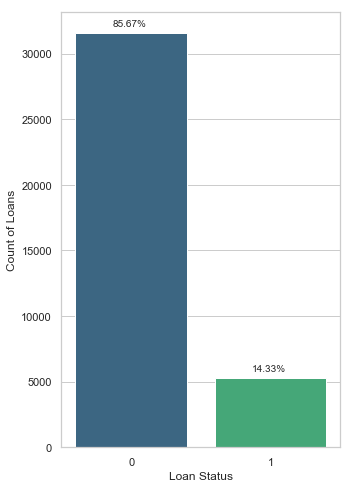

In [41]:
#Lets first see the distribution of our predictor variable- Loan Status
plt.figure(figsize=(5,8))
ax=sns.countplot(loan['loan_status'],palette='viridis')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height/len(loan)), (x+width/3,height+500))
labels("Loan Status", "Count of Loans")

We have around 5000 bad loans which constitutes around 14% of out total loans. For our univariate analysis, we will try to find out factors which increases the default rate to 17 %(20% increase from average 14%), and can consider them as business risk.

In [44]:
loan['loan_amnt'].mean()

11141.327652183352

10145    5.42 
9302     5.42 
18590    5.42 
12558    5.42 
12538    5.42 
         ...  
6456     23.91
1619     24.11
1799     24.11
5964     24.11
13492    24.40
Name: int_rate, Length: 36847, dtype: float64

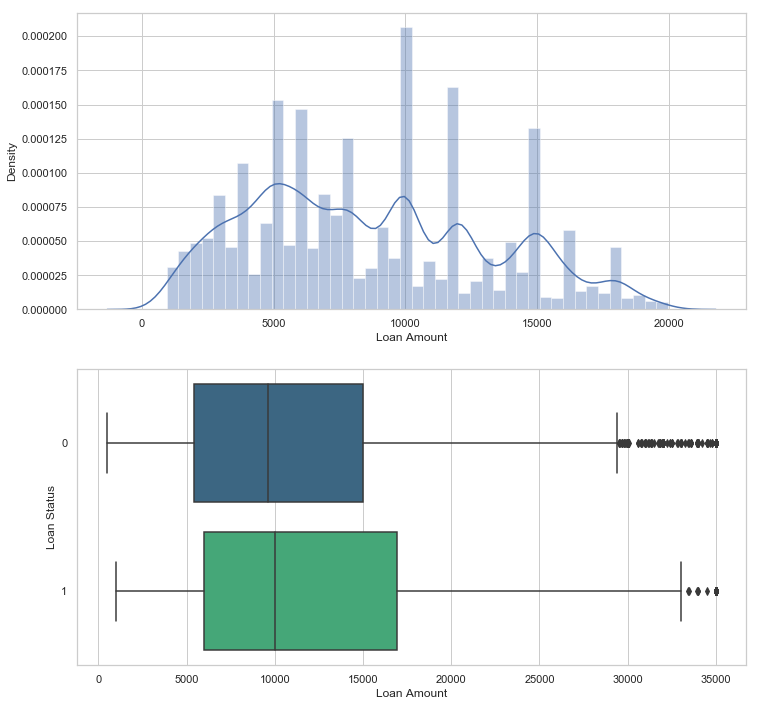

In [45]:
#Checking the distribution of Loan_amount through histogram and boxplot

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.distplot(loan.loc[loan['loan_amnt']<20000,'loan_amnt'],kde=True)
labels('Loan Amount','Density')
plt.subplot(2,1,2)
ax=sns.boxplot(x=loan['loan_amnt'],y=loan['loan_status'],palette='viridis')
labels('Loan Amount','Loan Status')
loan['int_rate'].sort_values()


We can see from the graph that maximum loans ae between 5000 and 10000 and loans with higher amount are more prone to getting default. Also, there are spikes in loan amount at every 5k, so lets bin the loan_amount in 5k bins and analyse the pattern of default.

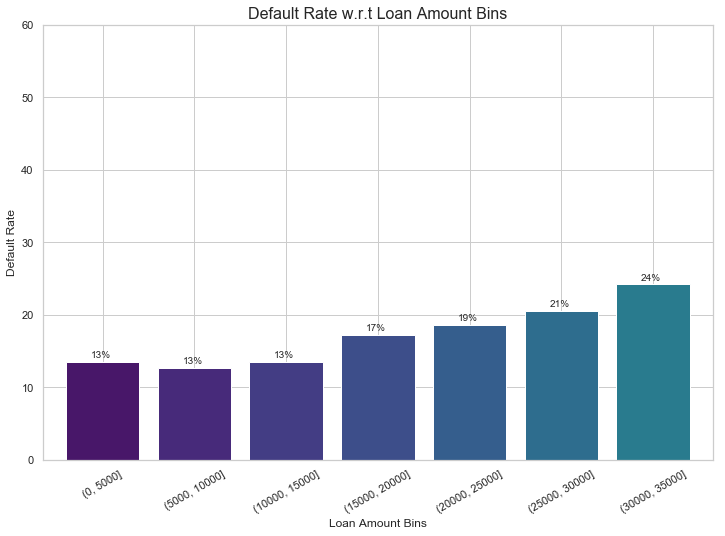

In [43]:
#Creating bin of 5000 each for Loan amount

bins=pd.IntervalIndex.from_tuples([(i,i+5000) for i in np.arange(0,35000,5000)])
loan_amount_bins=pd.cut(loan['loan_amnt'],bins=bins)

#plotting the graph for Loan amount in bins of 5k w.r.t to Loan Status
default_rate_plot(loan_amount_bins,'Loan Amount Bins')

We can see that loans above 15000 have a default rate of more than 19% in all the bins.

Lets see the funding amount column now. Funding amount is the amount that is finally given to the applicant as the loan amount. Let analyse the cases where Lending Club decided to give lesser amount than the requested loan amount.

In [44]:
#Analysing the Loans where Funding amount < Loan amount.
loan.loc[loan['funded_amnt']<loan['loan_amnt'],'loan_status'].value_counts()

0    1406
1    311 
Name: loan_status, dtype: int64

So in cases, where funding amount is less than loan amount, 311 loans from 1707 loans were default. Lets plot the data to visualize.

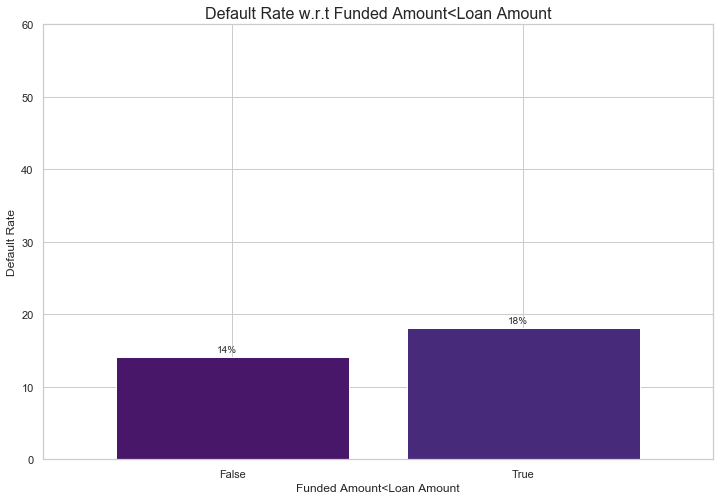

In [45]:
#Plotting graph to visualize loan default rate when funding amount is less than loan amount
default_rate_plot(loan['funded_amnt']<loan['loan_amnt'],'Funded Amount<Loan Amount',X_tick_rotation=0)

In case funded amount is less than loan amount, 18% of the loans default. So, we should avoid giving loans where Lending Club decides that Funding amount<Loan Amount.

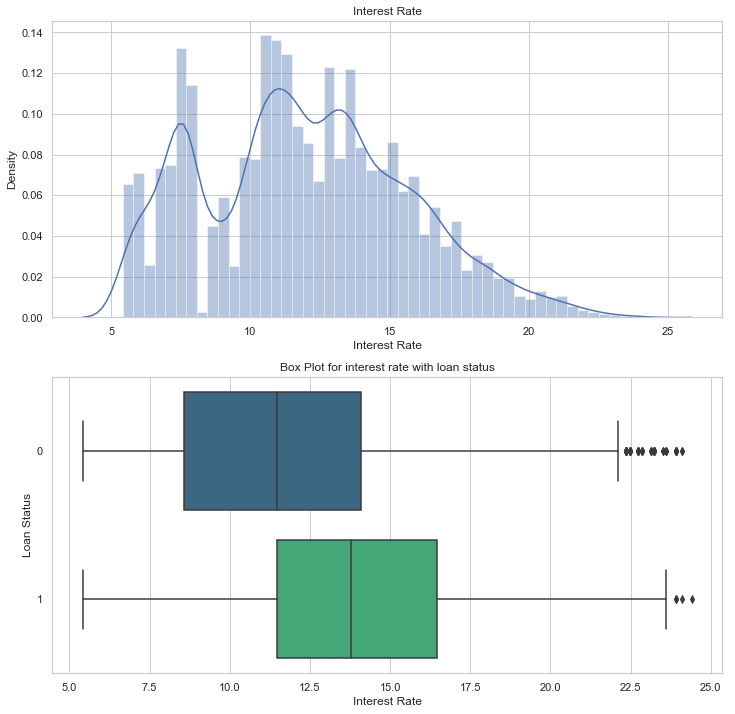

In [46]:
#Checking the distribution of int_rate through histogram and box plot

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title('Interest Rate')
sns.distplot(loan['int_rate'])
labels('Interest Rate','Density')
plt.subplot(2,1,2)
plt.title('Box Plot for interest rate with loan status')
sns.boxplot(loan['int_rate'],y=loan['loan_status'],palette='viridis')
labels('Interest Rate','Loan Status')

The default rates goes high if we increase the interest rate, lets bin the interest rate in bins of 5% and analyse the default pattern.

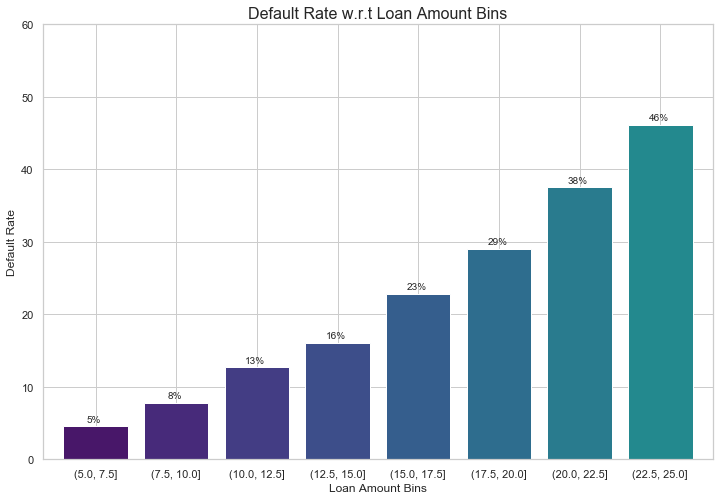

In [47]:
#Creating bin of 5% each
bins=pd.IntervalIndex.from_tuples([(i,i+2.5) for i in np.arange(5,25,2.5)])
int_rate_bins=pd.cut(loan['int_rate'],bins=bins)

#plotting the graph for Loan amount in bins of 5k w.r.t to Loan Status
default_rate_plot(int_rate_bins,'Loan Amount Bins',X_tick_rotation=0)

We can see from the above graph that loan with interest rate greater than 15% have high chances of defalt rate.

In [70]:
print("Mean", end=" ")
print(loan['earliest_cr_line_years_old'].mean())
print("SD", end=" ")
print(loan['earliest_cr_line_years_old'].std())
print("Total Records", end=" ")
SDL1=loan['earliest_cr_line_years_old'].mean()-loan['earliest_cr_line_years_old'].std()
SDU1=loan['earliest_cr_line_years_old'].mean()+loan['earliest_cr_line_years_old'].std()
SDL2=loan['earliest_cr_line_years_old'].mean()-loan['earliest_cr_line_years_old'].std()*6
SDU2=loan['earliest_cr_line_years_old'].mean()+loan['earliest_cr_line_years_old'].std()*6

print(len(loan['earliest_cr_line_years_old']))
print("Records between 17 and 29", end=" ")
print(len(loan[(loan['earliest_cr_line_years_old']>SDL2) & (loan['earliest_cr_line_years_old']<SDU2)]))
print(len(loan[(loan['earliest_cr_line_years_old']>SDL2) & (loan['earliest_cr_line_years_old']<SDU2)])/len(loan['earliest_cr_line_years_old']))


print(SDL2)
print(SDU2)

Mean 23.23157923304475
SD 6.62548535920439
Total Records 36847
Records between 17 and 29 36843
0.9998914429940022
-16.52133292218159
62.984491388271096


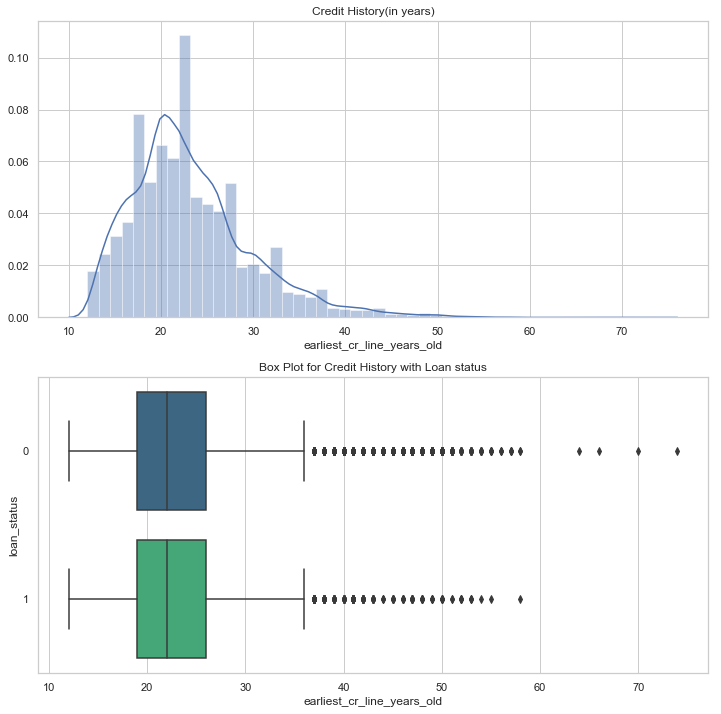

In [72]:
#Checking the distribution of earliest credit line through histogram and boxplot



plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title('Credit History(in years)')
sns.distplot(loan['earliest_cr_line_years_old'])
plt.subplot(2,1,2)
plt.title('Box Plot for Credit History with Loan status')
sns.boxplot(loan['earliest_cr_line_years_old'],y=loan['loan_status'],palette='viridis')

Majority of the loans are taken by people with Credit history centered around 20 years old. But this does not seem to have much effect on the loan default rate. So we can ignore this factor for our analysis.

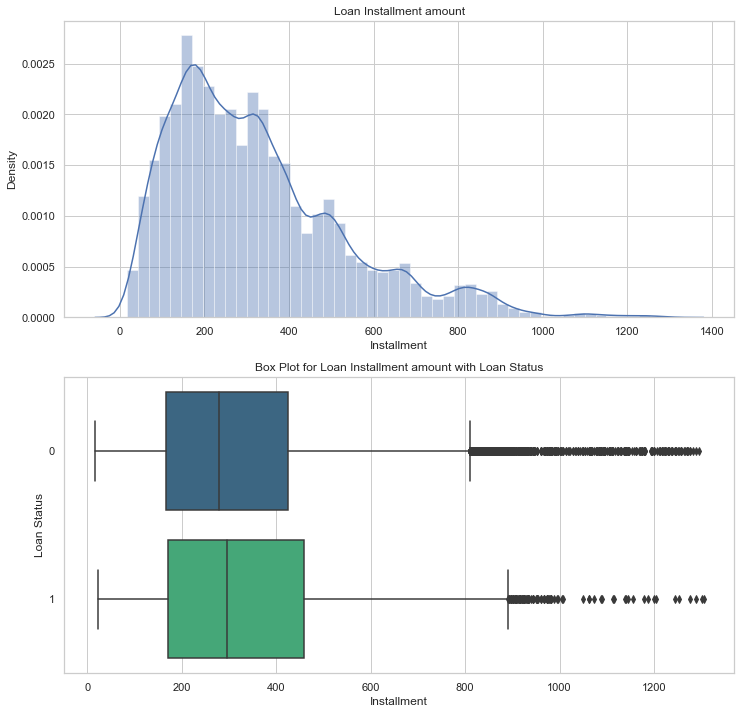

In [49]:
#Checking the distribution of Installment amount through histogram and Loan Installment amount

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title('Loan Installment amount')
sns.distplot(loan['installment'])
labels('Installment','Density')
plt.subplot(2,1,2)
plt.title('Box Plot for Loan Installment amount with Loan Status')
sns.boxplot(loan['installment'],y=loan['loan_status'],palette='viridis')
labels('Installment','Loan Status')

The loan installments are mostly around 200-400 and it does not seem that it affects the Default rate but lets categorize them in bins of 200 to see if some patterns can emerge for default rate.

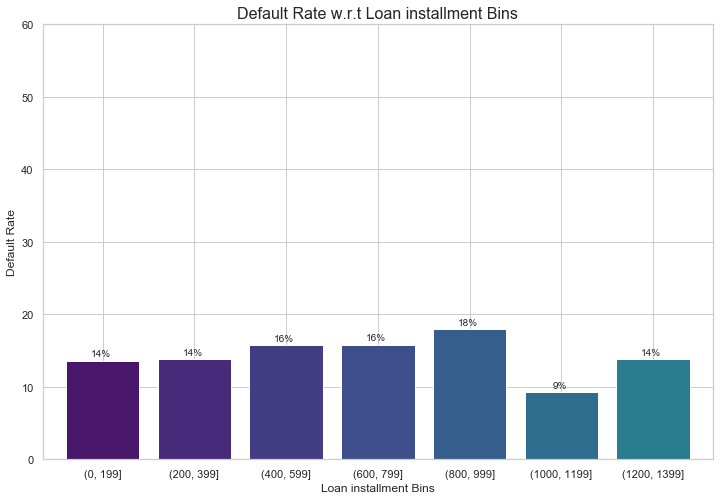

In [50]:
#Creating bin of 200 each
bins=pd.IntervalIndex.from_tuples([(i,i+199) for i in np.arange(0,1500,200)])
installment_rate_bins=pd.cut(loan['installment'],bins=bins)

#plotting the graph for Loan installment amount in bins of 200 w.r.t to Loan Status
default_rate_plot(installment_rate_bins,'Loan installment Bins',X_tick_rotation=0)


Although the loan default rate is 18% for installment between 800-999, the number of installments are very low in that scenario and we can ignore this factor as well.

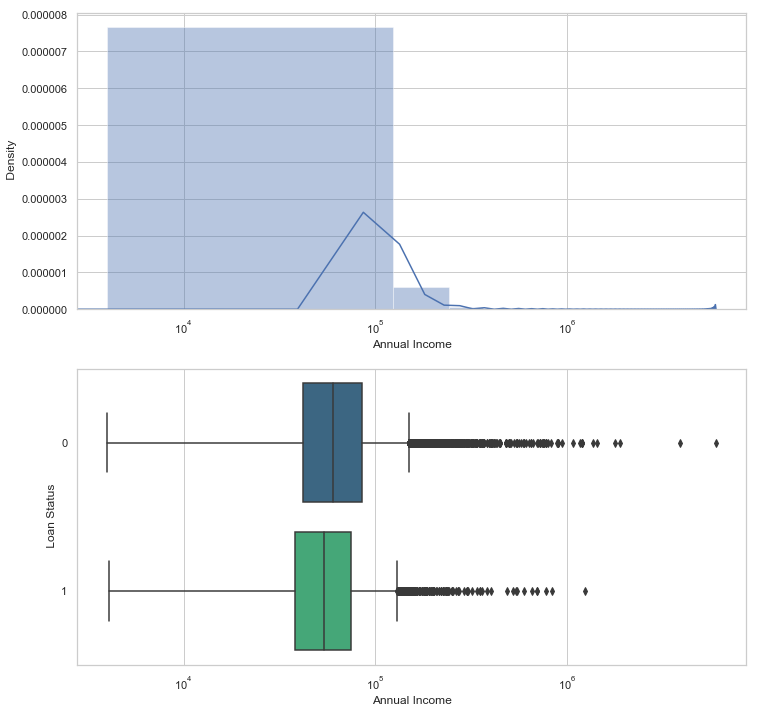

In [51]:
#Checking the distribution of Annual Income through histogram and boxplot

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.distplot(loan['annual_inc'],kde=True)
labels('Annual Income',' Density')
plt.xscale('log')
plt.subplot(2,1,2)
ax=sns.boxplot(x=loan['annual_inc'],y=loan['loan_status'],palette='viridis')
plt.xscale('log')
labels('Annual Income',' Loan Status')

We can see that the default rate is higher when the income is low. Lets categorize them into bins to validate our theory. Since the income is very spread out, we will use quantiles to bin them with the below logic:
1. Very Low - 0.05 quantile
2. Low - 0.05-0.3 quantile
3. Medium - 0.3-0.7 quantile
4. High- 0.7-0.95 quantile
5. Very High - 0.95-1 quantile

0.00    4000.0   
0.05    24000.0  
0.30    45000.0  
0.70    76000.0  
0.95    141998.8 
1.00    6000000.0
Name: annual_inc, dtype: float64


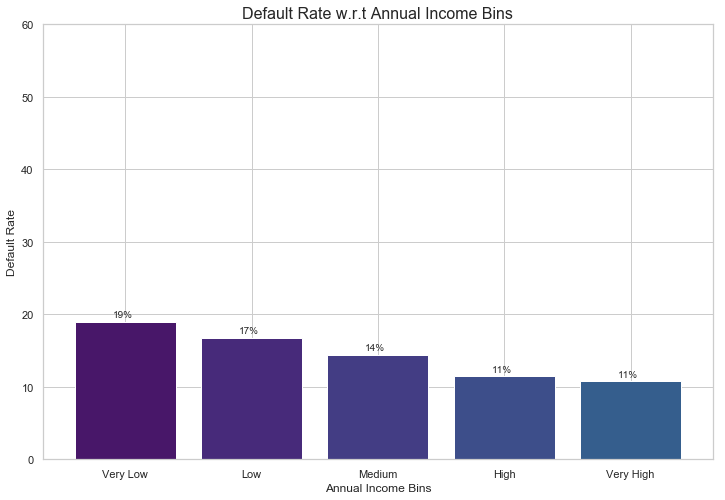

In [52]:
#Creating bins with the above quantile logic
bins=['Very Low','Low','Medium','High','Very High']
print(loan['annual_inc'].quantile([0,0.05,0.3,0.7,0.95,1]))
annual_income_bins= pd.qcut(loan.annual_inc,q=[0,0.05,0.3,0.7,0.95,1],labels=bins)

#plotting the graph for Annual Income w.r.t to Loan Status
default_rate_plot(annual_income_bins,'Annual Income Bins',X_tick_rotation=0)

We can see from the above graph that there is a 17% and 19% chance of default if the income of a person falls in category of Low(b/w 24k and 45k) and Very Low(less than 24k).

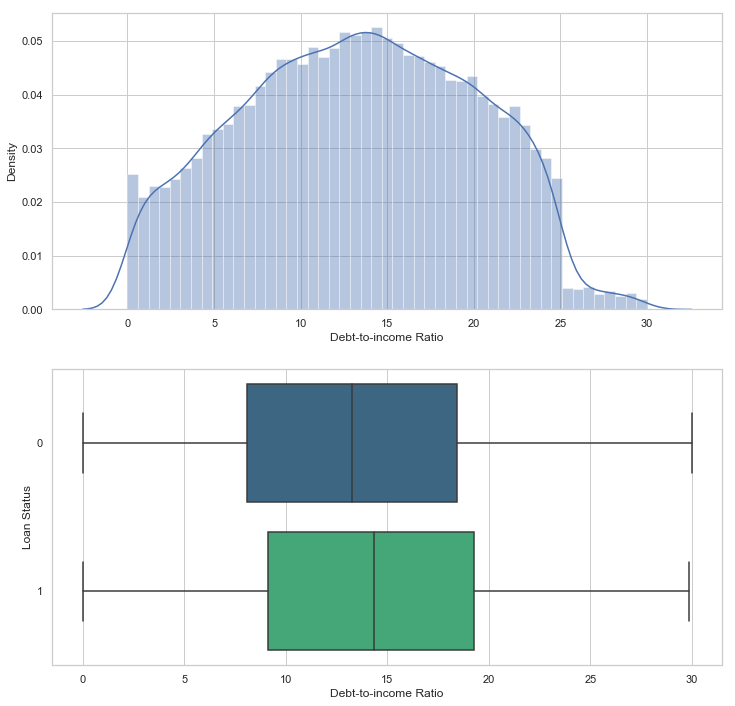

In [53]:
#Checking the distribution of dti through histogram and boxplot

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.distplot(loan['dti'],kde=True)
labels('Debt-to-income Ratio','Density')
plt.subplot(2,1,2)
ax=sns.boxplot(x=loan['dti'],y=loan['loan_status'],palette='viridis')
labels('Debt-to-income Ratio','Loan Status')

People with higher DTI(Debt to income) ratio are more prone to default. Lets bin them into size of 5 to visualize better.

(10, 15]    9238
(15, 20]    8461
(5, 10]     7496
(20, 25]    6332
(0, 5]      4572
(25, 30]    596 
Name: dti, dtype: int64


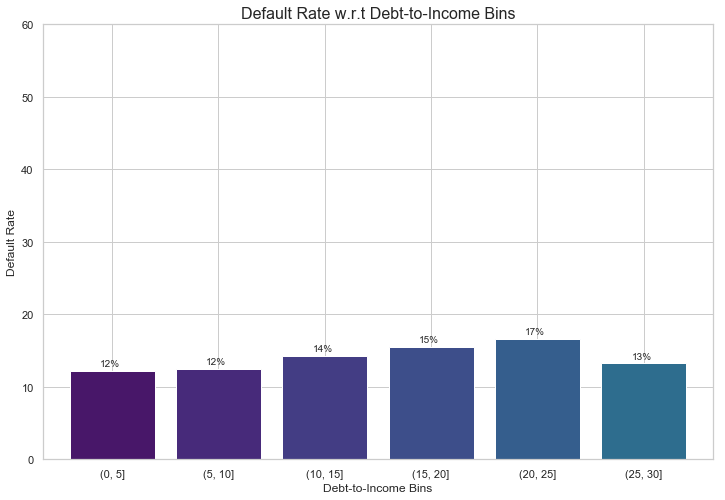

In [54]:
#Creating bin of 200 each for DTI
bins=pd.IntervalIndex.from_tuples([(i,i+5) for i in np.arange(0,30,5)])
dti_bins=pd.cut(loan['dti'],bins=bins)
print(dti_bins.value_counts())
#plotting the graph for Loan installment amount in bins of 200 w.r.t to Loan Status
default_rate_plot(dti_bins,'Debt-to-Income Bins',X_tick_rotation=0)

People with High DTI have higher chances of Default. We have a high Default rate at dti between 20-25. There is a drop in Default rate at DTI b/w 25-30 since there are lesser observations in that segment.We will analyse it further in our bivariate analysis

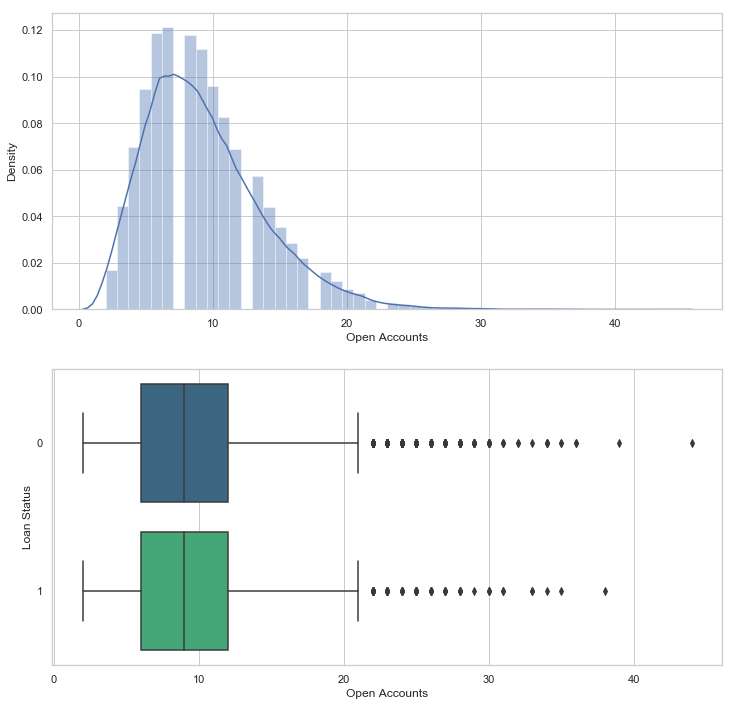

In [55]:
#Checking the distribution of Open Account through histogram and boxplot

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.distplot(loan['open_acc'],kde=True)
labels('Open Accounts','Density')
plt.subplot(2,1,2)
ax=sns.boxplot(x=loan['open_acc'],y=loan['loan_status'],palette='viridis')
labels('Open Accounts','Loan Status')

Open Accounts does not seem to have any effect on the Default rate.

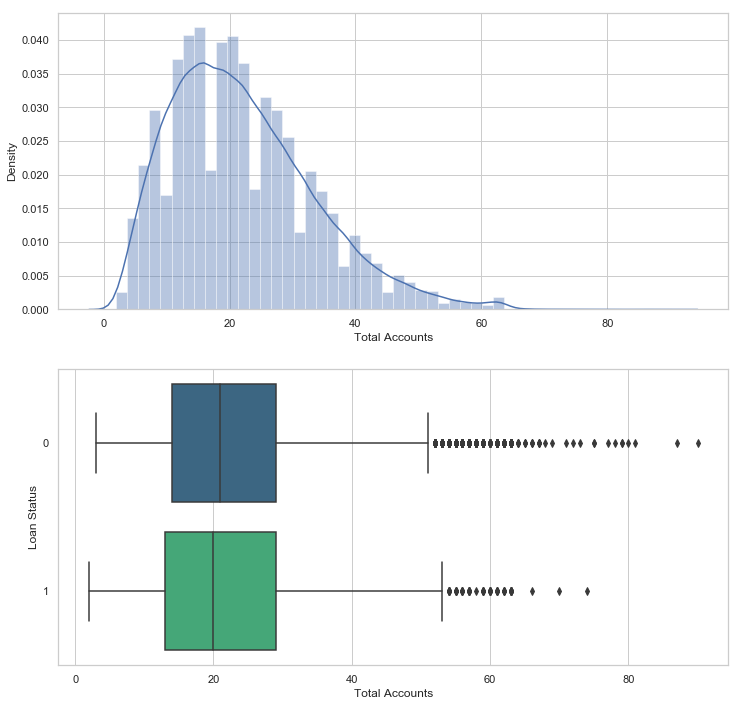

In [56]:
#Checking the distribution of Total accounts through histogram and boxplot

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.distplot(loan['total_acc'],kde=True)
labels('Total Accounts','Density')
plt.subplot(2,1,2)
ax=sns.boxplot(x=loan['total_acc'],y=loan['loan_status'],palette='viridis')
labels('Total Accounts','Loan Status')

Total Accounts does not seem to have any effect on the Default rate.

#### Let now look at the Categorical variables:

36    27590
60    9257 
Name: term, dtype: int64

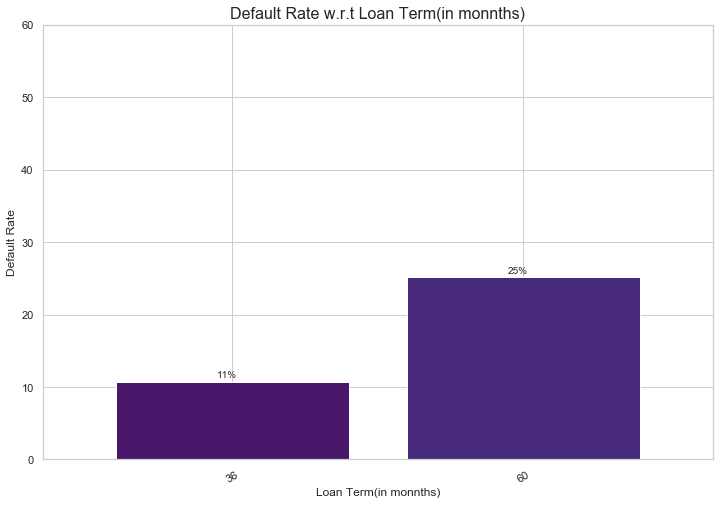

In [57]:
#Lets first look at the term(3 year or 5 year Loan term)

default_rate_plot(loan['term'],'Loan Term(in monnths)')
loan.term.value_counts()

We can see that the chances of loan default increases a lot if Loan term is longer (60 months)

B    11150
A    9518 
C    7486 
D    4868 
E    2585 
F    944  
G    296  
Name: grade, dtype: int64

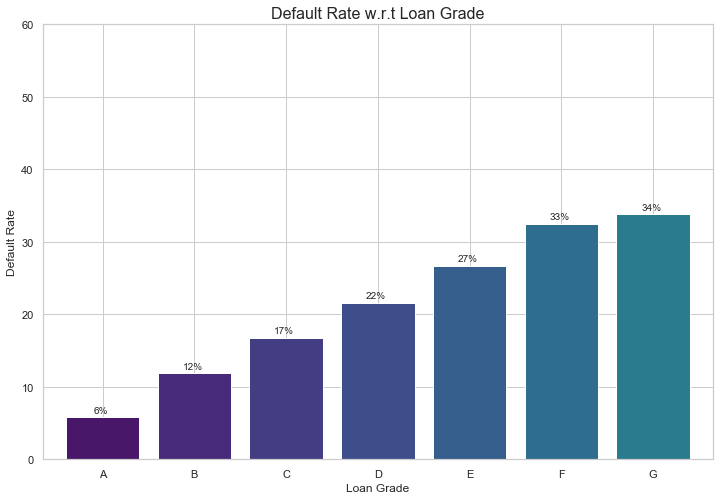

In [58]:
#Lets take a look at the Loan Grade now
default_rate_plot(loan['grade'],'Loan Grade',X_tick_rotation=0)
loan.grade.value_counts()

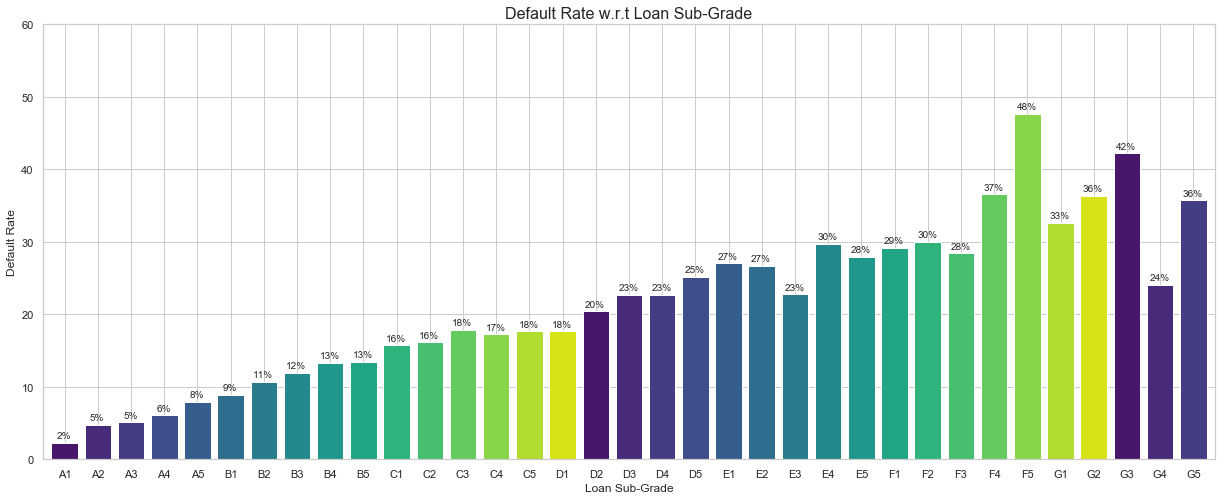

In [59]:
#Lets take a look at the Loan Sub-Grade now
default_rate_plot(loan['sub_grade'],'Loan Sub-Grade',figsize=(21,8),X_tick_rotation=0)

Loan default rate increases as the Grade and sub-grade changes from A-G. A and B are the best grades to provide the loan. For C grade, we can go till C2 but should avoid going beyond it.

10.0    8369
0.0     4341
2.0     4207
3.0     3951
4.0     3297
5.0     3161
1.0     3077
6.0     2136
7.0     1689
8.0     1410
9.0     1209
Name: emp_length, dtype: int64

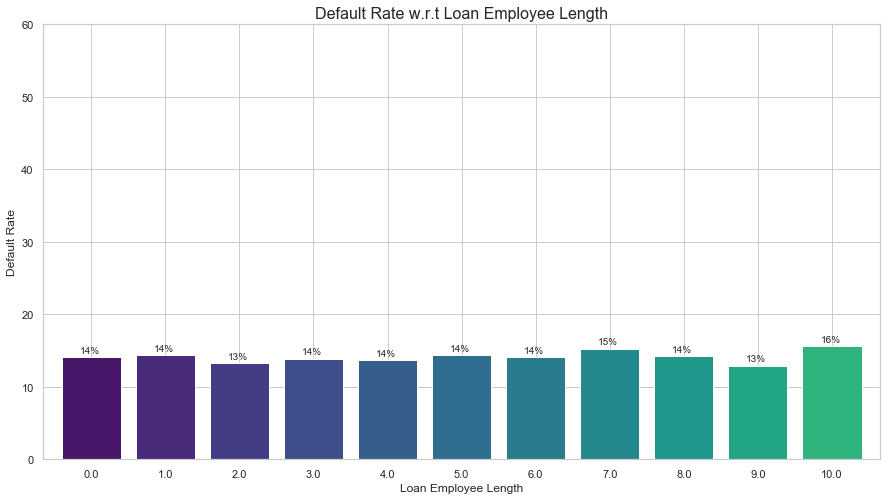

In [60]:
#Lets take a look at the Employee length and how the Default rate
default_rate_plot(loan['emp_length'],'Loan Employee Length',figsize=(15,8),X_tick_rotation=0)
loan['emp_length'].value_counts()

The Default rates remain more or less the same except for people with employee length greater than 10 years have more default rates than the others. We can analyse it further in our Bivariate analysis.

RENT        17698
MORTGAGE    16343
OWN         2708 
OTHER       98   
Name: home_ownership, dtype: int64

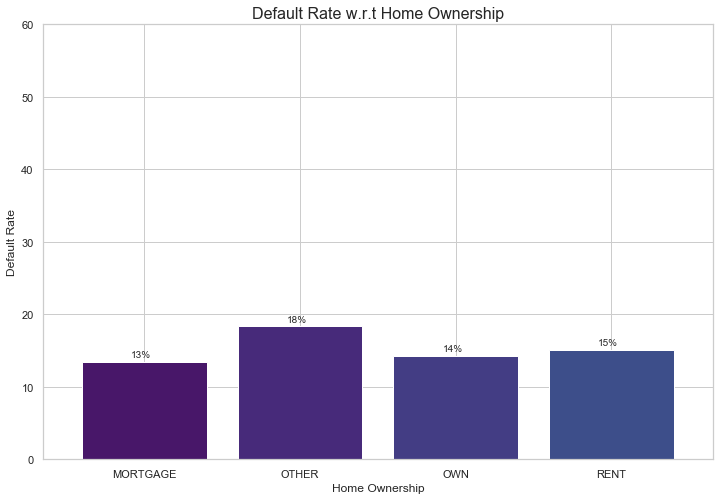

In [61]:
#Lets take a look at the Home ownership and how the Default rate
default_rate_plot(loan['home_ownership'],'Home Ownership',X_tick_rotation=0)
loan['home_ownership'].value_counts()

People having home ownership mentioned as others have high default rate, although the count of Others is very less. We can analyse it further in our Bivariate analysis.

,LoanStatNew,Description
112,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"


None


Not Verified       15582
Verified           11771
Source Verified    9494 
Name: verification_status, dtype: int64

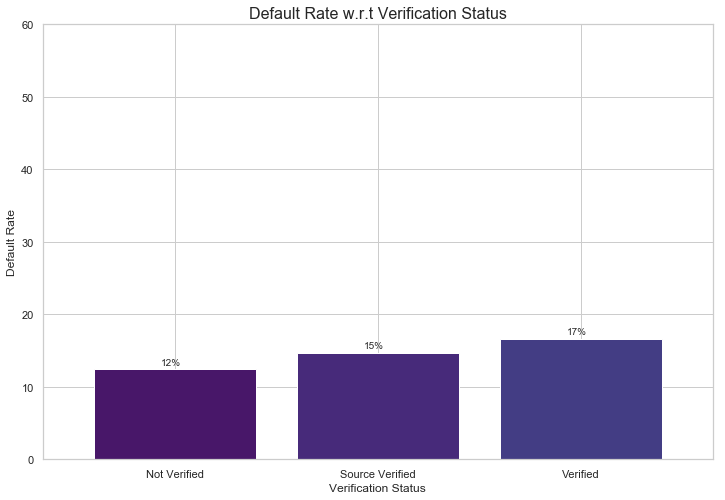

In [62]:
#Lets have a look at the default rate in terms of verification status
print(display(loan_dictionary[loan_dictionary['LoanStatNew']=='verification_status']))
default_rate_plot(loan['verification_status'],'Verification Status',X_tick_rotation=0)
loan['verification_status'].value_counts()

Surprisingly, when the income is verified by the Lending Club, the default rate increases. We can analyse it further in our bivariate analysis.

,LoanStatNew,Description
87,purpose,A category provided by the borrower for the loan request.


None


debt_consolidation    17384
credit_card           4801 
other                 3608 
home_improvement      2737 
major_purchase        2061 
small_business        1657 
car                   1431 
wedding               894  
medical               647  
moving                543  
house                 349  
vacation              342  
educational           299  
renewable_energy      94   
Name: purpose, dtype: int64

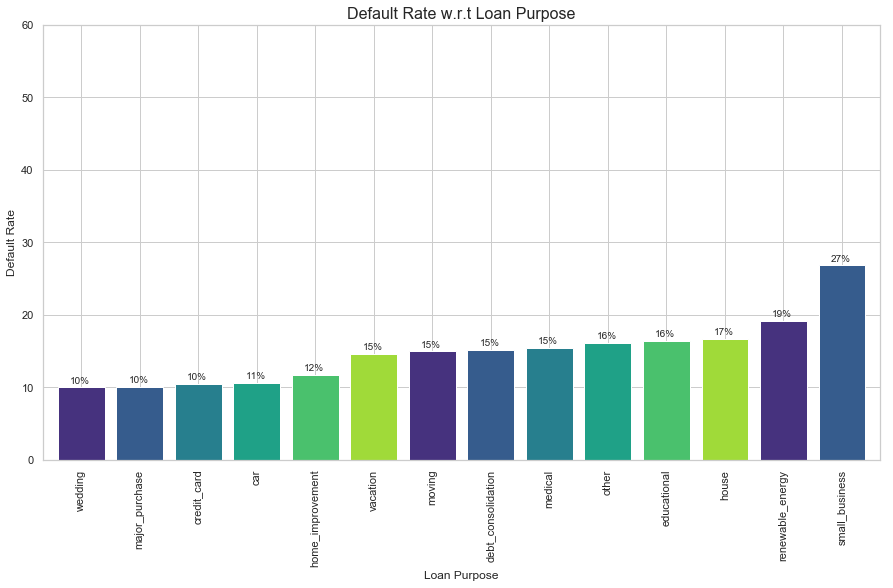

In [63]:
#Lets have a look at the default rate in terms of purpose
print(display(loan_dictionary[loan_dictionary['LoanStatNew']=='purpose']))
default_rate_plot(loan['purpose'],'Loan Purpose',figsize=(15,8),sort=True,X_tick_rotation=90)
loan['purpose'].value_counts()

We can see that for loans taken for small business, renewable energy and house, the default rate is high. We can analyse it further in our bivariate analysis.

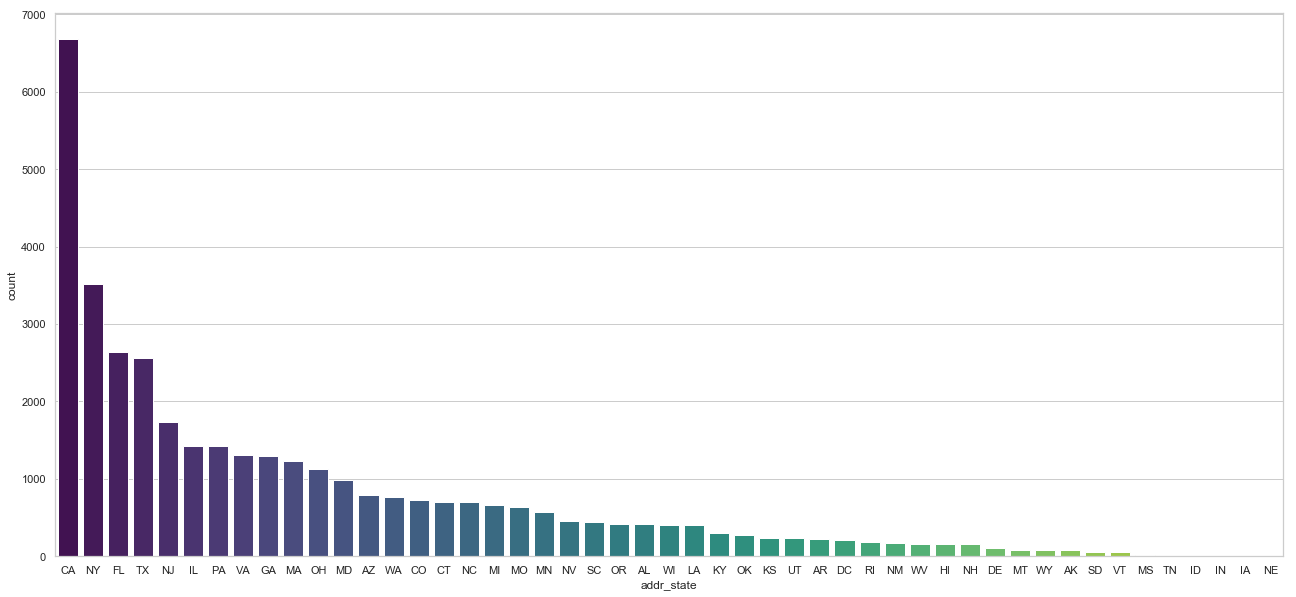

In [64]:
#Lets have a look at the count of loans w.r.t to Address State
#print(display(loan_dictionary[loan_dictionary['LoanStatNew']=='purpose']))
plt.figure(figsize=(22,10))
sns.countplot(loan['addr_state'],order=loan['addr_state'].value_counts().index,palette='viridis')

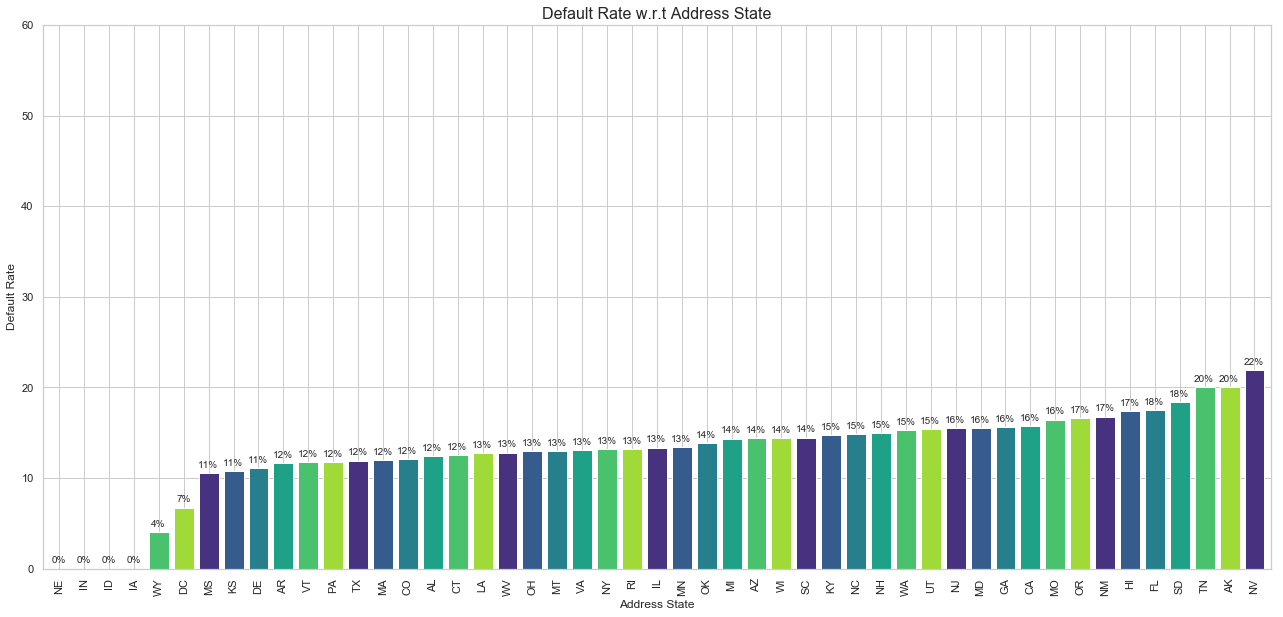

In [65]:
#Lets draw the Default Rate graph for Address state
default_rate_plot(loan['addr_state'],'Address State',sort=True,figsize=(22,10),X_tick_rotation=90)

Majority of the loans are originating from California, New York, Florida and Texas.

We can see that the state including Nevada, Alaska, Tennessee, South Dakota, Florida, Hawaii, New Mexico, Origon have high default rate.

,LoanStatNew,Description
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


None


0     32853
1     3065 
2     635  
3     198  
4     57   
5     21   
6     10   
7     4    
8     2    
11    1    
9     1    
Name: delinq_2yrs, dtype: int64

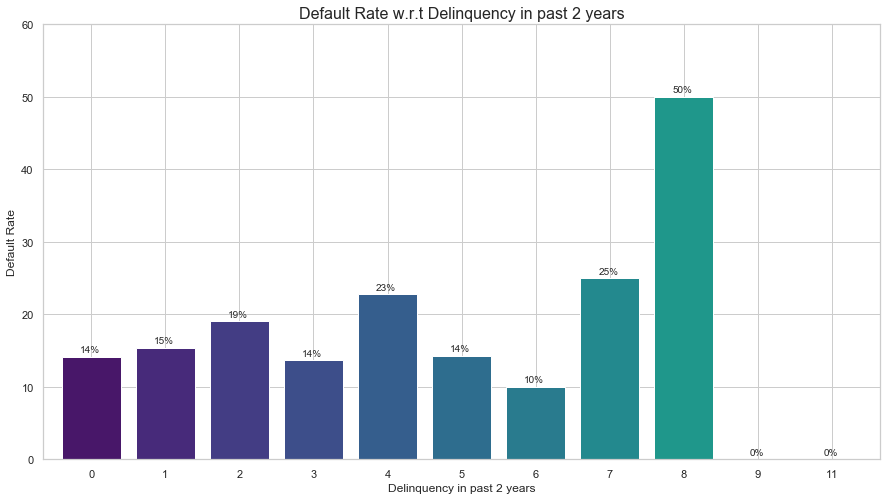

In [66]:
#Lets have a look at the default rate in terms of Delinquency in past 2 years
print(display(loan_dictionary[loan_dictionary['LoanStatNew']=='delinq_2yrs']))
default_rate_plot(loan['delinq_2yrs'],'Delinquency in past 2 years',figsize=(15,8),X_tick_rotation=0)
loan['delinq_2yrs'].value_counts()

Although, delinquency is very high at values 2,4,7,8, but the size of the sample is very less in these cases(total~700). Most people have the values as 0.

,LoanStatNew,Description
32,inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


None


0    17877
1    10191
2    5405 
3    2843 
4    294  
5    136  
6    57   
7    32   
8    12   
Name: inq_last_6mths, dtype: int64

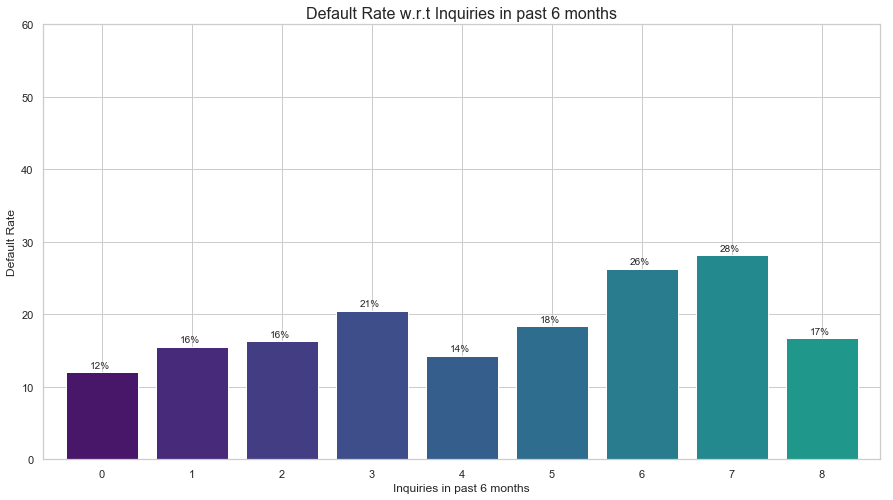

In [67]:
#Lets have a look at the default rate in terms of Inquiries in past 6 months
print(display(loan_dictionary[loan_dictionary['LoanStatNew']=='inq_last_6mths']))
default_rate_plot(loan['inq_last_6mths'],'Inquiries in past 6 months',figsize=(15,8),X_tick_rotation=0)
loan['inq_last_6mths'].value_counts()

We can see that the default rate increases as the number of inquiries is more than 2 in the past 6 months.

,LoanStatNew,Description
85,pub_rec,Number of derogatory public records


None


0    34916
1    1877 
2    45   
3    7    
4    2    
Name: pub_rec, dtype: int64

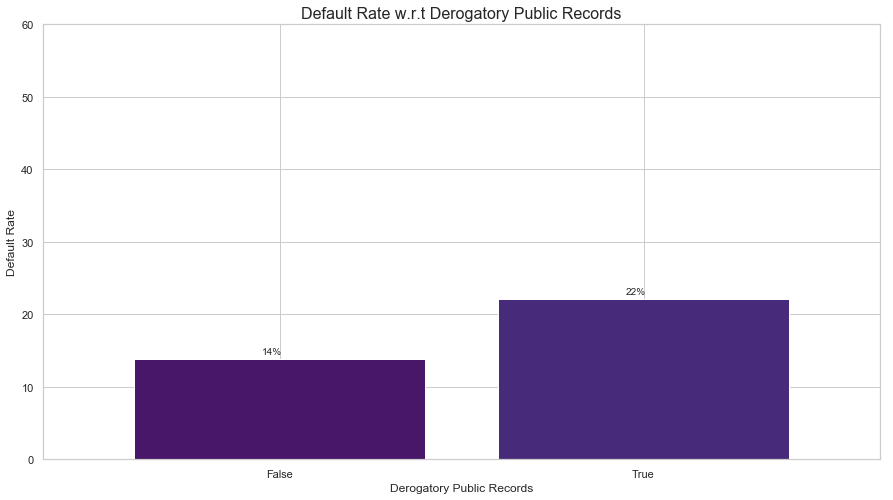

In [68]:
#Lets have a look at the default rate in terms of Derogatory Public Records
print(display(loan_dictionary[loan_dictionary['LoanStatNew']=='pub_rec']))
default_rate_plot(loan['pub_rec']>0,'Derogatory Public Records',figsize=(15,8),X_tick_rotation=0)
loan['pub_rec'].value_counts()

Derogatory Public Records: If a person has derogtory public records in his file, then he is more likely to default.

,LoanStatNew,Description
86,pub_rec_bankruptcies,Number of public record bankruptcies


None


0.0    35312
1.0    1530 
2.0    5    
Name: pub_rec_bankruptcies, dtype: int64

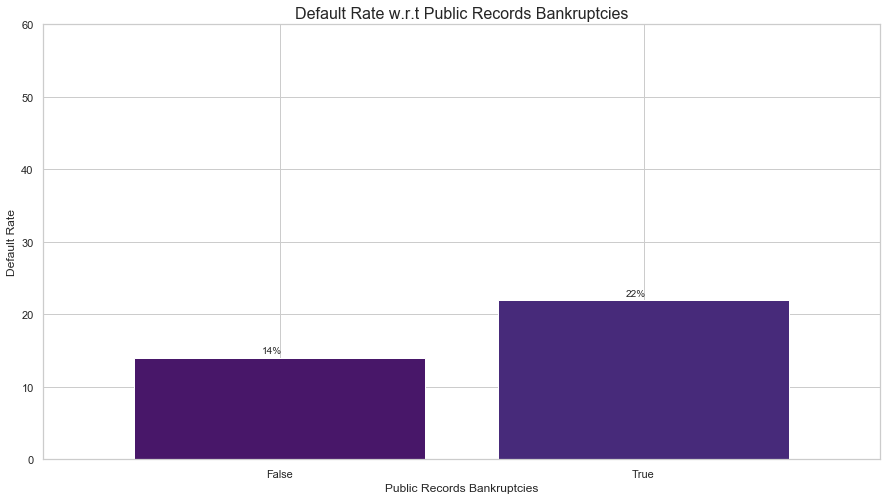

In [69]:
#Lets have a look at the default rate in terms of Public Records Bankruptcies
print(display(loan_dictionary[loan_dictionary['LoanStatNew']=='pub_rec_bankruptcies']))
default_rate_plot(loan['pub_rec_bankruptcies']>0,'Public Records Bankruptcies',figsize=(15,8),X_tick_rotation=0)
loan['pub_rec_bankruptcies'].value_counts()

Public Records Bankruptcies : If a person has public records bankruptcies in his file, then he is more likely to default.

12    4037
11    3855
10    3591
9     3374
8     3288
7     3223
6     3093
5     2836
4     2756
3     2517
1     2166
2     2111
Name: Loan_issue_Month, dtype: int64

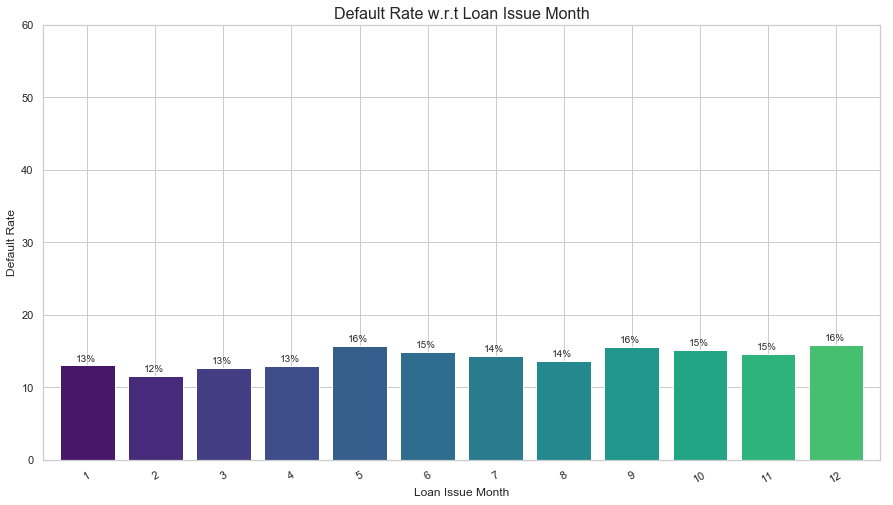

In [70]:
#Lets have a look at the default rate in terms of Loan Issue Month
default_rate_plot(loan['Loan_issue_Month'],'Loan Issue Month',figsize=(15,8))
loan['Loan_issue_Month'].value_counts()

Loan Issue Month: Loans originating in May, September and December have a higher chance of default but it is not significant.

2011    19801
2010    11214
2009    4713 
2008    1112 
2007    7    
Name: Loan_issue_Year, dtype: int64

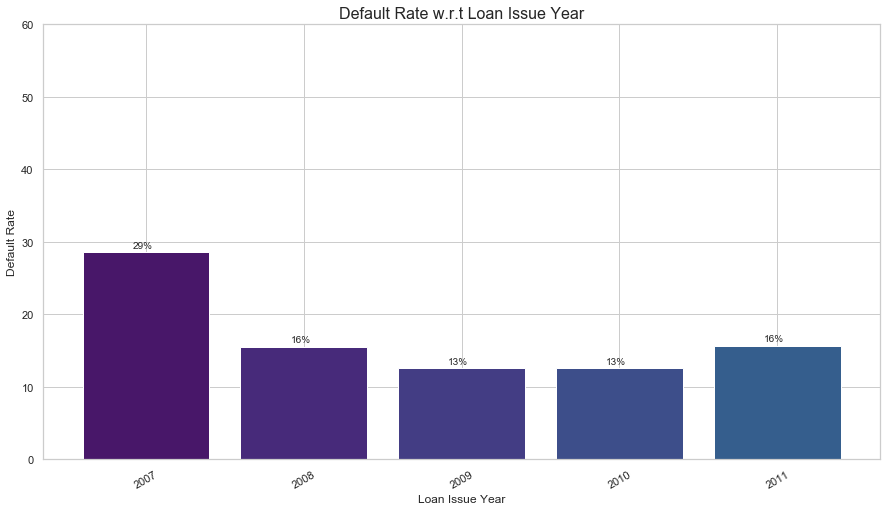

In [71]:
#Lets have a look at the default rate in terms of Public Records Bankruptcies
default_rate_plot(loan['Loan_issue_Year'],'Loan Issue Year',figsize=(15,8))
loan['Loan_issue_Year'].value_counts()

Loan Issue Year: Loan Default rate was higher in earlier years and then decreased and then increased again in 2011

### Observations from our Univariate Analysis
1. We have around 14% of Default rate(Loans Charged Off/Total Loans). We will try to determine the factors which lets default rate increase to more than 17% to idetify a Loan as a Risk.
2. Loan Amount: We can see that loans above 15000 have a default rate of more than 19%.
3. If the Loan Funded amount by Lending Club is less than Loan amount, then there is high chance of default(around 18%).
4. Loan Interest Rate : If interest rate is more than 15%, then the default rate goes above 23%.

5. Loan installment : Loan installment above 1800 has 18 % default rate.

6. Annual Income: If the annual income is less than 45k, then default rate goes up by more than 17%

7. DTI: With higher DTI, the default rate goes up.

8. Loan Term : Loan with 5 years term are more likely to default. The default rate goes as high as 25%.

9. Loan Grade : Loan grades with C and lower grade are more likely to default. The default rate is more than 17% in C and lower grades.

10. Loan Sub grade: Loan grades with C2 and lower grade have a default rate of more than 17%.

11. Employee Length : Experience of more than 10 years are more likely to default.

12. Verification Status: Status “Verified” has a high default rate of around 17%.

13. Purpose: Loans taken for small business, renewable energy and house are more likely to default.

14. Address State:Loans originating from the state including Nevada, Alaska, Tennessee, South Dakota, Florida, Hawaii, New Mexico, Oregon have high default rate.

15. Inquiry Rate : If the number of inquiries is more than 2 in the past 6 months, then the default is more than 17%.

16. Derogatory Public Records: If the person has any public derogatory records, the default rate goes up by 22%. 

17. Public Records Bankruptcies: If a person has public records bankruptcies in his file, then the default rate goes above 22%.



## Bivariate Analysis

annual_inc    Very Low                                                   Low  \
loan_amnt    (0, 5000] (5000, 10000] (10000, 15000] (15000, 20000] (0, 5000]   
Total Loans   1241.0    581.0         44.0           3.0            3289.0     
Default Rate  18.0      20.0          23.0           33.0           15.0       

annual_inc                                                               \
loan_amnt    (5000, 10000] (10000, 15000] (15000, 20000] (20000, 25000]   
Total Loans   3875.0        1786.0         575.0          125.0           
Default Rate  15.0          20.0           25.0           35.0            

annual_inc                                    Medium                \
loan_amnt    (25000, 30000] (30000, 35000] (0, 5000] (5000, 10000]   
Total Loans   8.0            2.0            2987.0    4938.0         
Default Rate  12.0           50.0           13.0      12.0           

annual_inc                                                                \
loan_amnt    (10000, 15000] (15000, 20000] (20000, 25000] (25000, 30000]   
Total Loans   3192.0         1872.0         931.0          220.0           
Default Rate  13.0           20.0           22.0           29.0            

annual_inc                       High                               \
loan_amnt    (30000, 35000] (0, 5000] (5000, 10000] (10000, 15000]   
Total Loans   133.0          1200.0    2459.0        2072.0          
Default Rate  38.0           8.0       9.0           10.0            

annual_inc                                                                \
loan_amnt    (15000, 20000] (20000, 25000] (25000, 30000] (30000, 35000]   
Total Loans   1461.0         1275.0         342.0          393.0           
Default Rate  12.0           16.0           17.0           25.0            

annual_inc   Very High                                              \
loan_amnt    (0, 5000] (5000, 10000] (10000, 15000] (15000, 20000]   
Total Loans   138.0     349.0         341.0          287.0           
Default Rate  10.0      9.0           8.0            9.0             

annual_inc                                                 
loan_amnt    (20000, 25000] (25000, 30000] (30000, 35000]  
Total Loans   414.0          122.0          192.0          
Default Rate  14.0           16.0           13.0

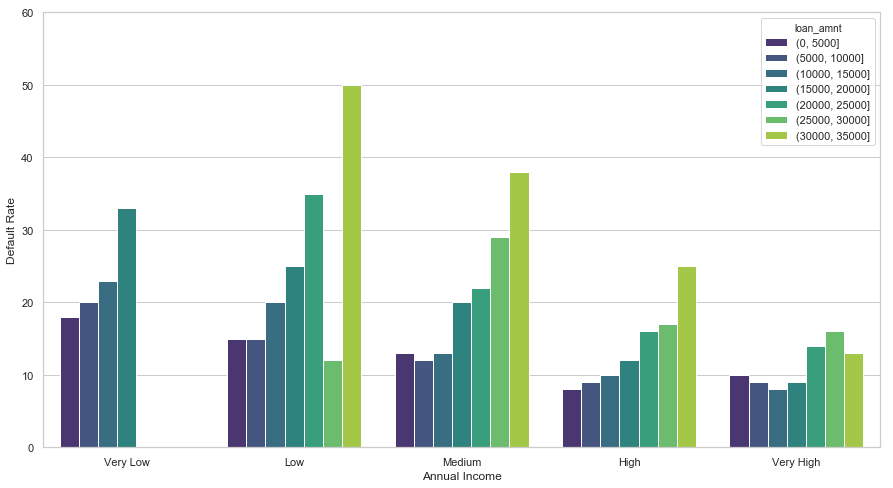

In [72]:
#Checking the Annual INcome w.r.t to Loan Amount and Default Rate
df=loan.pivot_table(values='dti',index=[annual_income_bins,loan_amount_bins],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = round(df[1]/df[0] *100)
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(15,8))
ax=sns.barplot('annual_inc','Default Rate',hue='loan_amnt',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,60)
plt.xlabel('Annual Income')

df.T

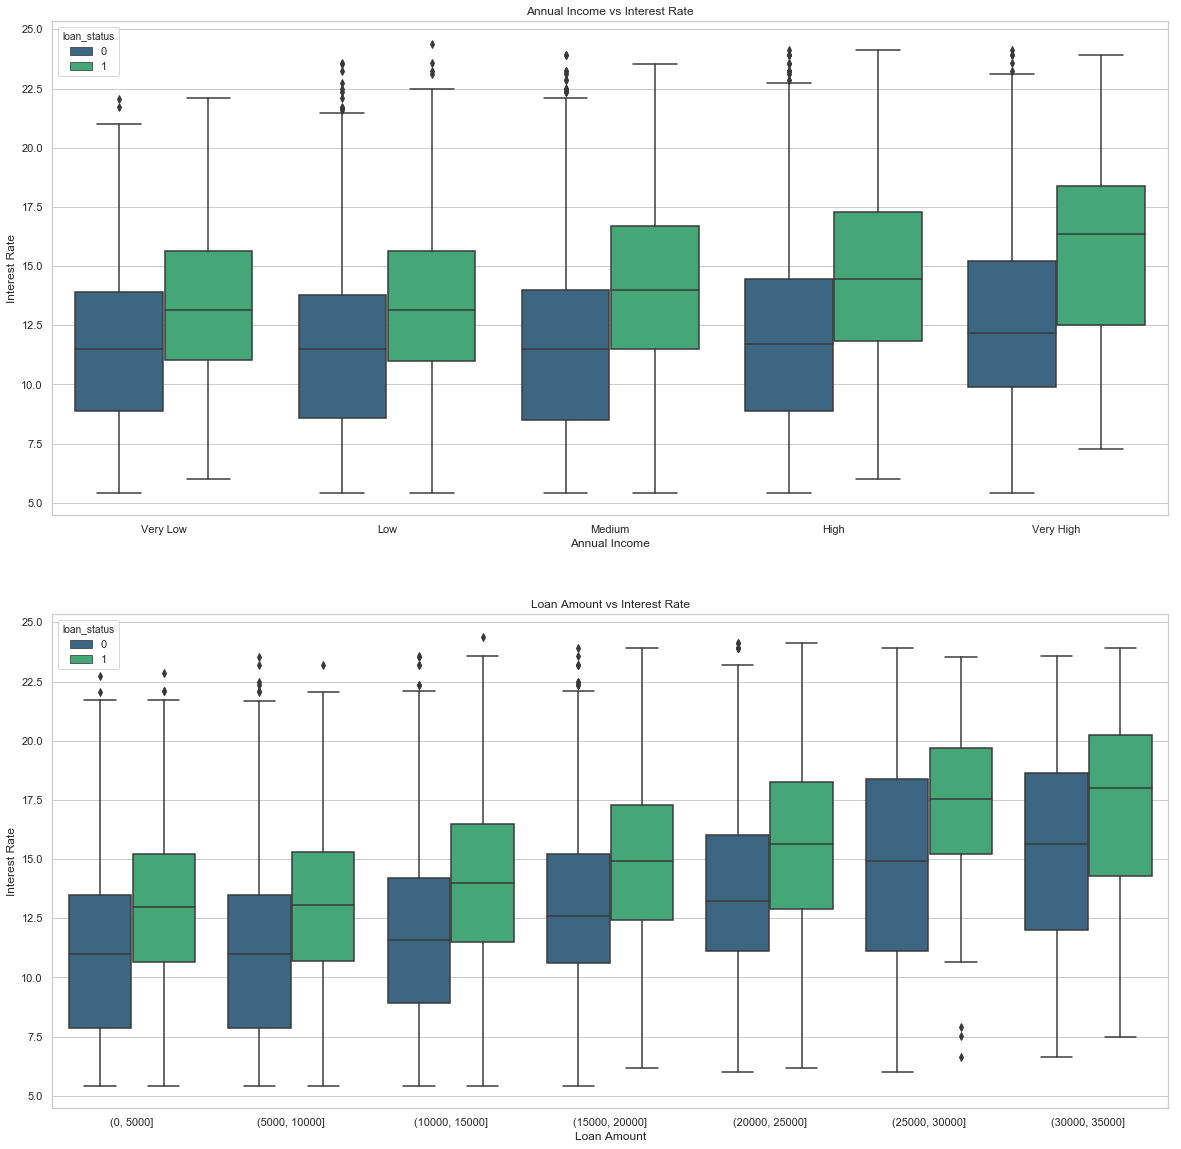

In [73]:
#Annual income and interest rate with default rate
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('Annual Income vs Interest Rate')
sns.boxplot(annual_income_bins,loan['int_rate'],hue=loan['loan_status'],palette='viridis')
labels('Annual Income','Interest Rate')

#Annual income and interest rate with default rate
plt.subplot(2,1,2)
plt.title('Loan Amount vs Interest Rate')
sns.boxplot(loan_amount_bins,loan['int_rate'],hue=loan['loan_status'],palette='viridis')
labels('Loan Amount','Interest Rate')

People who are charged more interest rate in all levels of income are more prone to getting default. Also, for lower loan amount, the interest charged in low.

int_rate     (5.0, 7.5]                                              \
loan_amnt     (0, 5000] (5000, 10000] (10000, 15000] (15000, 20000]   
Total Loans   1597.0     2080.0        960.0          302.0           
Default Rate  5.0        5.0           4.0            3.0             

int_rate                                                  (7.5, 10.0]  \
loan_amnt    (20000, 25000] (25000, 30000] (30000, 35000]   (0, 5000]   
Total Loans   100.0          23.0           10.0           1748.0       
Default Rate  6.0            4.0            10.0           10.0         

int_rate                                                                 \
loan_amnt    (5000, 10000] (10000, 15000] (15000, 20000] (20000, 25000]   
Total Loans   2650.0        1314.0         465.0          178.0           
Default Rate  7.0           8.0            5.0            7.0             

int_rate                                   (10.0, 12.5]                \
loan_amnt    (25000, 30000] (30000, 35000]    (0, 5000] (5000, 10000]   
Total Loans   66.0          NaN             2134.0       2844.0         
Default Rate  3.0           NaN             13.0         13.0           

int_rate                                                                  \
loan_amnt    (10000, 15000] (15000, 20000] (20000, 25000] (25000, 30000]   
Total Loans   1848.0         1115.0         716.0          120.0           
Default Rate  11.0           13.0           12.0           12.0            

int_rate                    (12.5, 15.0]                               \
loan_amnt    (30000, 35000]    (0, 5000] (5000, 10000] (10000, 15000]   
Total Loans   112.0          2159.0       2758.0        1683.0          
Default Rate  16.0           16.0         16.0          15.0            

int_rate                                                                  \
loan_amnt    (15000, 20000] (20000, 25000] (25000, 30000] (30000, 35000]   
Total Loans   1055.0         716.0          104.0          129.0           
Default Rate  17.0           17.0           15.0           22.0            

int_rate     (15.0, 17.5]                                              \
loan_amnt       (0, 5000] (5000, 10000] (10000, 15000] (15000, 20000]   
Total Loans   965.0        1438.0        1069.0         749.0           
Default Rate  24.0         22.0          20.0           26.0            

int_rate                                                  (17.5, 20.0]  \
loan_amnt    (20000, 25000] (25000, 30000] (30000, 35000]    (0, 5000]   
Total Loans   503.0          126.0          139.0          209.0         
Default Rate  22.0           28.0           24.0           32.0          

int_rate                                                                 \
loan_amnt    (5000, 10000] (10000, 15000] (15000, 20000] (20000, 25000]   
Total Loans   358.0         442.0          375.0          357.0           
Default Rate  30.0          28.0           27.0           32.0            

int_rate                                   (20.0, 22.5]                \
loan_amnt    (25000, 30000] (30000, 35000]    (0, 5000] (5000, 10000]   
Total Loans   160.0          159.0          41.0         71.0           
Default Rate  26.0           28.0           32.0         38.0           

int_rate                                                                  \
loan_amnt    (10000, 15000] (15000, 20000] (20000, 25000] (25000, 30000]   
Total Loans   108.0          128.0          161.0          84.0            
Default Rate  42.0           44.0           33.0           31.0            

int_rate                    (22.5, 25.0]                               \
loan_amnt    (30000, 35000]    (0, 5000] (5000, 10000] (10000, 15000]   
Total Loans   102.0          2.0          3.0           11.0            
Default Rate  40.0           50.0         33.0          64.0            

int_rate                                                                  
loan_amnt    (15000, 20000] (20000, 25000] (25000, 30000] (30000, 35

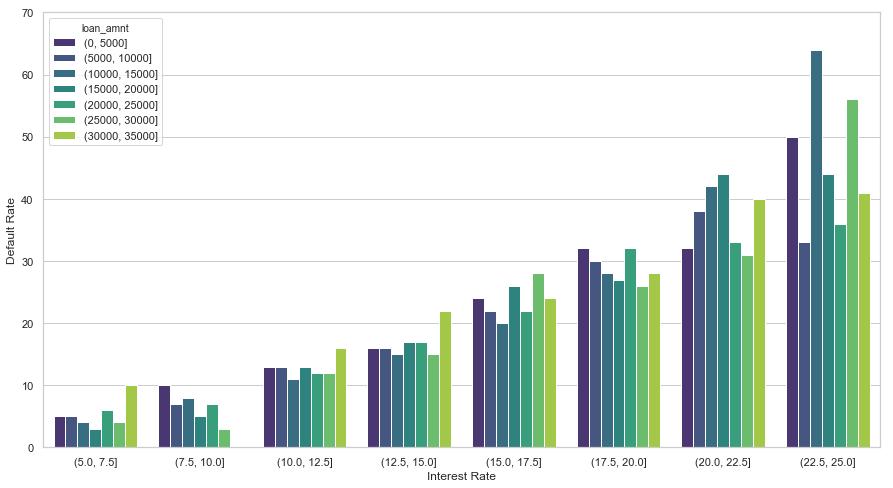

In [94]:
#Checking the Interest Rate w.r.t to Loan Amount and Default Rate
df=loan.pivot_table(values='dti',index=[int_rate_bins,loan_amount_bins],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = round(df[1]/df[0] *100)
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(15,8))
ax=sns.barplot('int_rate','Default Rate',hue='loan_amnt',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,70)
plt.xlabel('Interest Rate')

df.T

Analysis from the above chart:
1. Interest rate higher than 15% - Default rate is high
2. Interest rate between 12.5-15% - Loan amount should not be greater than 15k
3. It is ok to give loans at rate below 12.5%

int_rate     (5.0, 7.5]                                   (7.5, 10.0]          \
annual_inc     Very Low     Low  Medium    High Very High    Very Low     Low   
Total Loans   243.0      1272.0  2079.0  1283.0  195.0     335.0       1831.0   
Default Rate  7.0        7.0     5.0     2.0     1.0       13.0        10.0     

int_rate                               (10.0, 12.5]                          \
annual_inc    Medium    High Very High     Very Low     Low  Medium    High   
Total Loans   2505.0  1540.0  262.0     449.0        2388.0  3439.0  2164.0   
Default Rate  7.0     6.0     5.0       19.0         16.0    12.0    10.0     

int_rate               (12.5, 15.0]                                    \
annual_inc   Very High     Very Low     Low  Medium    High Very High   
Total Loans   449.0     495.0        2452.0  3242.0  2012.0  403.0      
Default Rate  8.0       20.0         19.0    16.0    13.0    9.0        

int_rate     (15.0, 17.5]                                   (17.5, 20.0]  \
annual_inc       Very Low     Low  Medium    High Very High     Very Low   
Total Loans   266.0        1244.0  1943.0  1271.0  265.0     65.0          
Default Rate  28.0         24.0    25.0    19.0    17.0      40.0          

int_rate                                    (20.0, 22.5]                      \
annual_inc      Low Medium   High Very High     Very Low   Low Medium   High   
Total Loans   381.0  793.0  648.0  173.0     16.0         84.0  256.0  254.0   
Default Rate  35.0   33.0   22.0   23.0      44.0         49.0  41.0   32.0    

int_rate               (22.5, 25.0]                         
annual_inc   Very High          Low Medium  High Very High  
Total Loans   85.0      8.0          16.0   30.0  11.0      
Default Rate  29.0      50.0         56.0   47.0  27.0

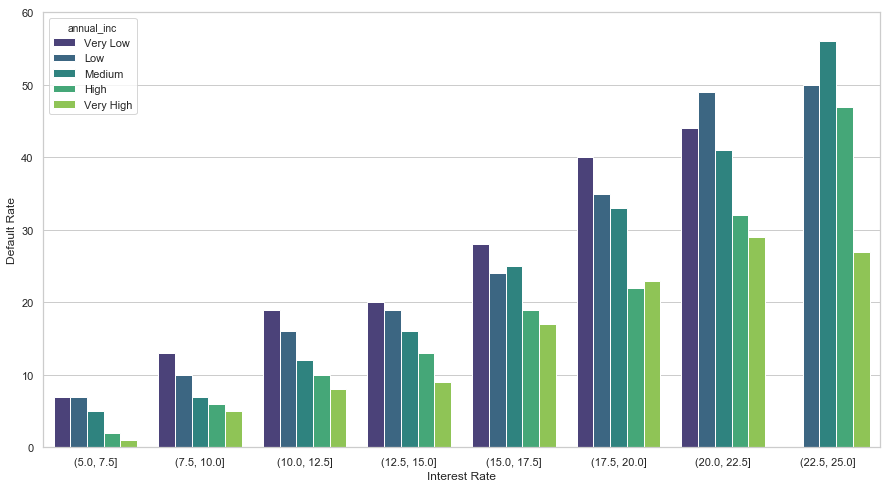

In [75]:
#Checking the Interest Rate w.r.t to Annual income and Default Rate
df=loan.pivot_table(values='dti',index=[int_rate_bins,annual_income_bins],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = round(df[1]/df[0] *100)
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(15,8))
ax=sns.barplot('int_rate','Default Rate',hue='annual_inc',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,60)
plt.xlabel('Interest Rate')

df.T

Whie it is ok to give loan with lower interest rate. Below is our analysis for the interest rate vs income pattern:
1. Income less than 24k - Interest rate below 10%
2. Income less than 45k- Interest rate below 12.5 %
3. Income less than 76k- Interest rate below 15%


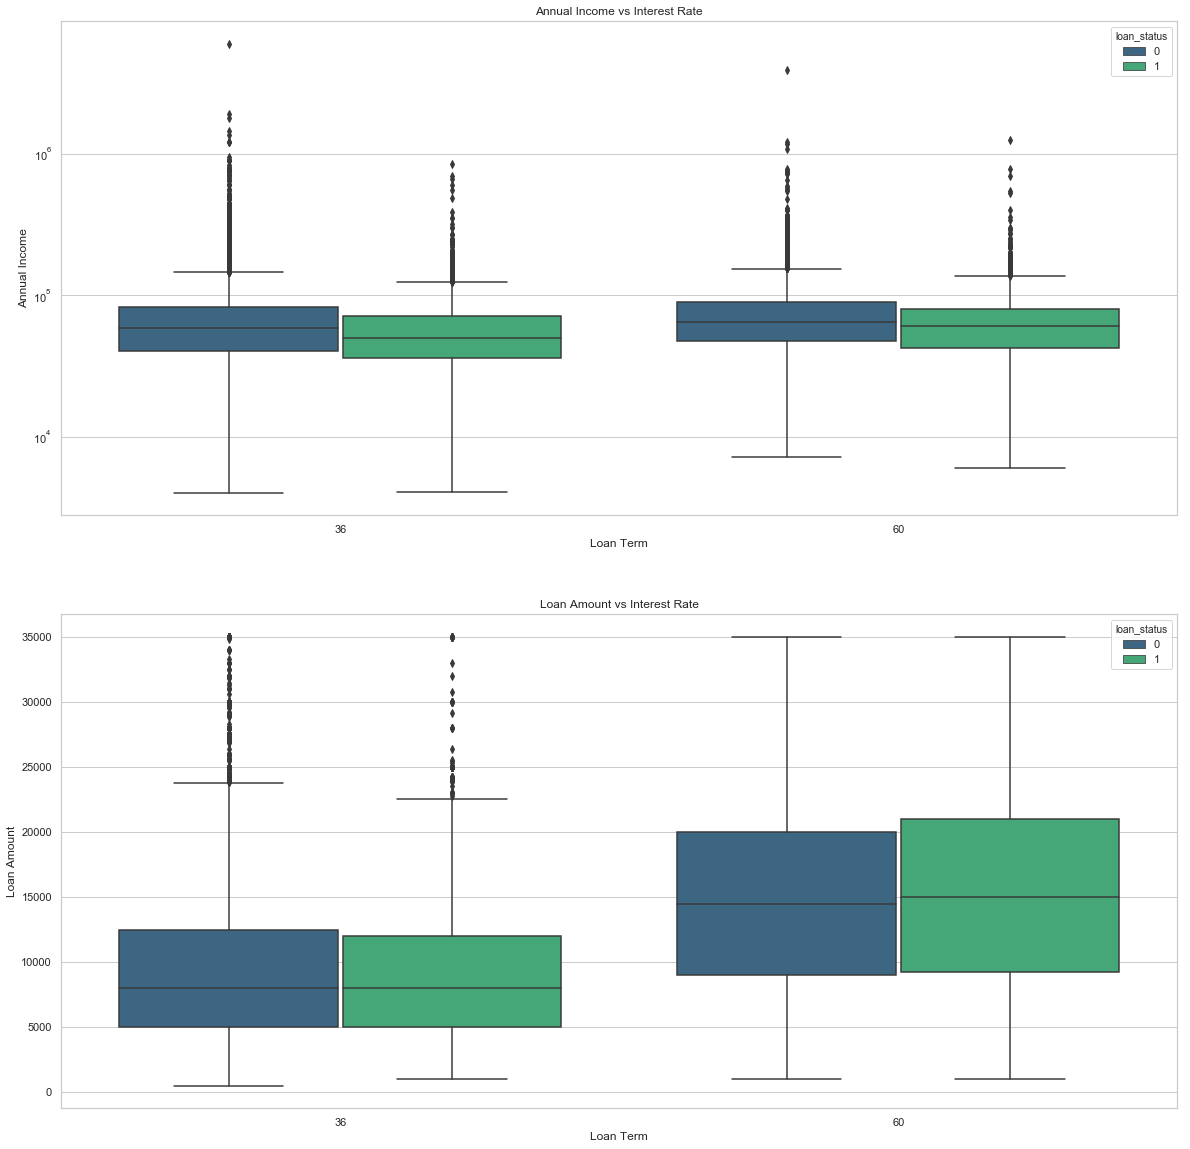

In [76]:
#Annual income and term with default rate
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('Annual Income vs Interest Rate')
#Plotting the Term vs Annual Income graph with estimator as Median since we have a lot of outliers in data
sns.boxplot(loan['term'],loan['annual_inc'],hue=loan['loan_status'],palette='viridis')
plt.yscale('log')
labels('Loan Term','Annual Income')
#Loan Amount and term with default rate
plt.subplot(2,1,2)
plt.title('Loan Amount vs Interest Rate')
sns.boxplot(loan['term'],loan['loan_amnt'],hue=loan['loan_status'],palette='viridis')
labels('Loan Term','Loan Amount')

For both terms of 3 and 5 years, default rate is more for people with lower income, although loan amount and term does not seem to indicate anything related to loan default.

term               36                                          60          \
annual_inc   Very Low     Low   Medium    High Very High Very Low     Low   
Total Loans   1603.0   7588.0  10537.0  6558.0  1304.0    266.0    2072.0   
Default Rate  16.0     13.0    10.0     8.0     8.0       35.0     29.0     

term                                    
annual_inc    Medium    High Very High  
Total Loans   3736.0  2644.0  539.0     
Default Rate  26.0    21.0    18.0

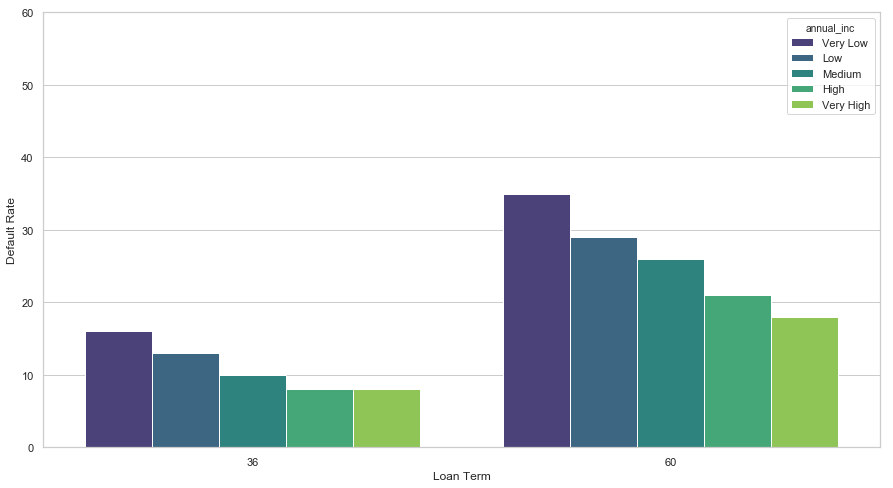

In [77]:
#Checking the Loan Term w.r.t to Annual income and Default Rate
df=loan.pivot_table(values='dti',index=[loan['term'],annual_income_bins],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = round(df[1]/df[0] *100)
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(15,8))
ax=sns.barplot('term','Default Rate',hue='annual_inc',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,60)
plt.xlabel('Loan Term')

df.T

term                36                                              \
loan_amnt    (0, 5000] (5000, 10000] (10000, 15000] (15000, 20000]   
Total Loans   7881.0    10235.0       5245.0         2386.0          
Default Rate  12.0      10.0          9.0            10.0            

term                                                             60  \
loan_amnt    (20000, 25000] (25000, 30000] (30000, 35000] (0, 5000]   
Total Loans   1446.0         205.0          192.0          974.0      
Default Rate  12.0           9.0            9.0            25.0       

term                                                                     \
loan_amnt    (5000, 10000] (10000, 15000] (15000, 20000] (20000, 25000]   
Total Loans   1967.0        2190.0         1812.0         1299.0          
Default Rate  24.0          23.0           26.0           26.0            

term                                        
loan_amnt    (25000, 30000] (30000, 35000]  
Total Loans   487.0          528.0          
Default Rate  25.0           30.0

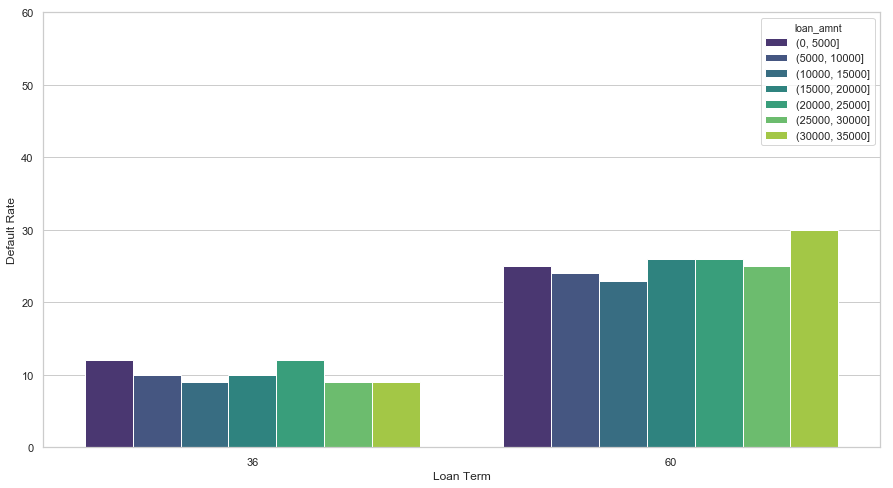

In [78]:
#Checking the Loan Term w.r.t Loan amount and Default Rate
df=loan.pivot_table(values='dti',index=[loan['term'],loan_amount_bins],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = round(df[1]/df[0] *100)
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(15,8))
ax=sns.barplot('term','Default Rate',hue='loan_amnt',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,60)
plt.xlabel('Loan Term')

df.T

Loan Term: We should totally avoid Loan term of 60 months as is evident from the above 2 graphs

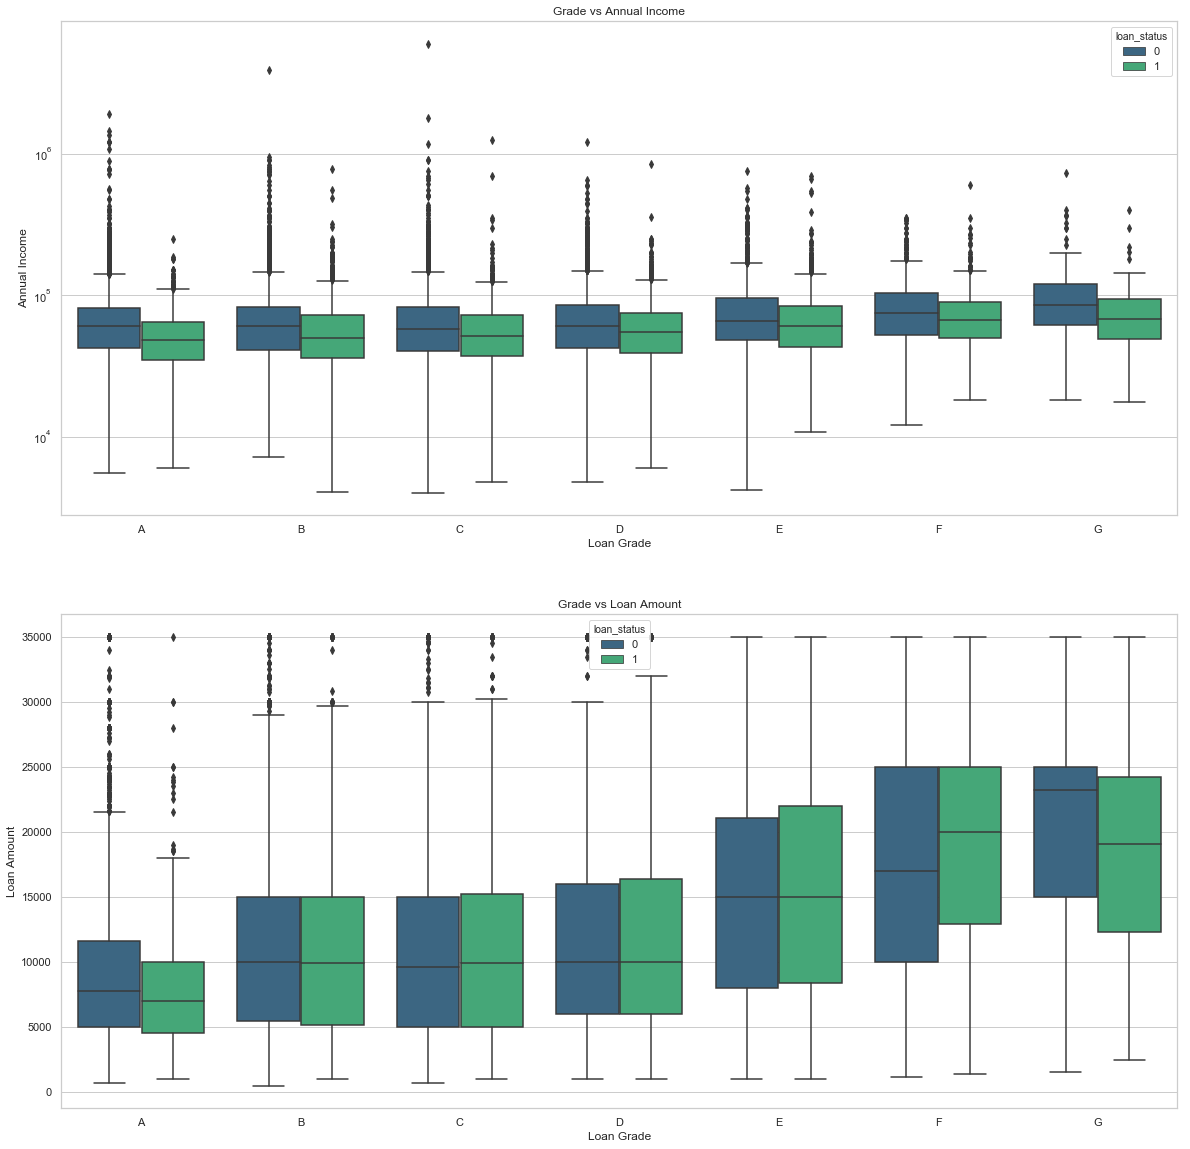

In [79]:
#Annual income and grade with default rate
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('Grade vs Annual Income')
#Plotting the Grade vs Annual Income graph with estimator as Median since we have a lot of outliers in data
sns.boxplot(loan['grade'],loan['annual_inc'],hue=loan['loan_status'],order=loan['grade'].sort_values().unique(),palette='viridis')
plt.yscale('log')
labels('Loan Grade','Annual Income')
#Loan Amount and Grade with default rate
plt.subplot(2,1,2)
plt.title('Grade vs Loan Amount')
sns.boxplot(loan['grade'],loan['loan_amnt'],hue=loan['loan_status'],order=loan['grade'].sort_values().unique(),palette='viridis')
labels('Loan Grade','Loan Amount')

Grades provide similar analysis like interest_rate.  People with lower income are more likely to default in all grades. Also, the loan amount increases with the increase in grade.

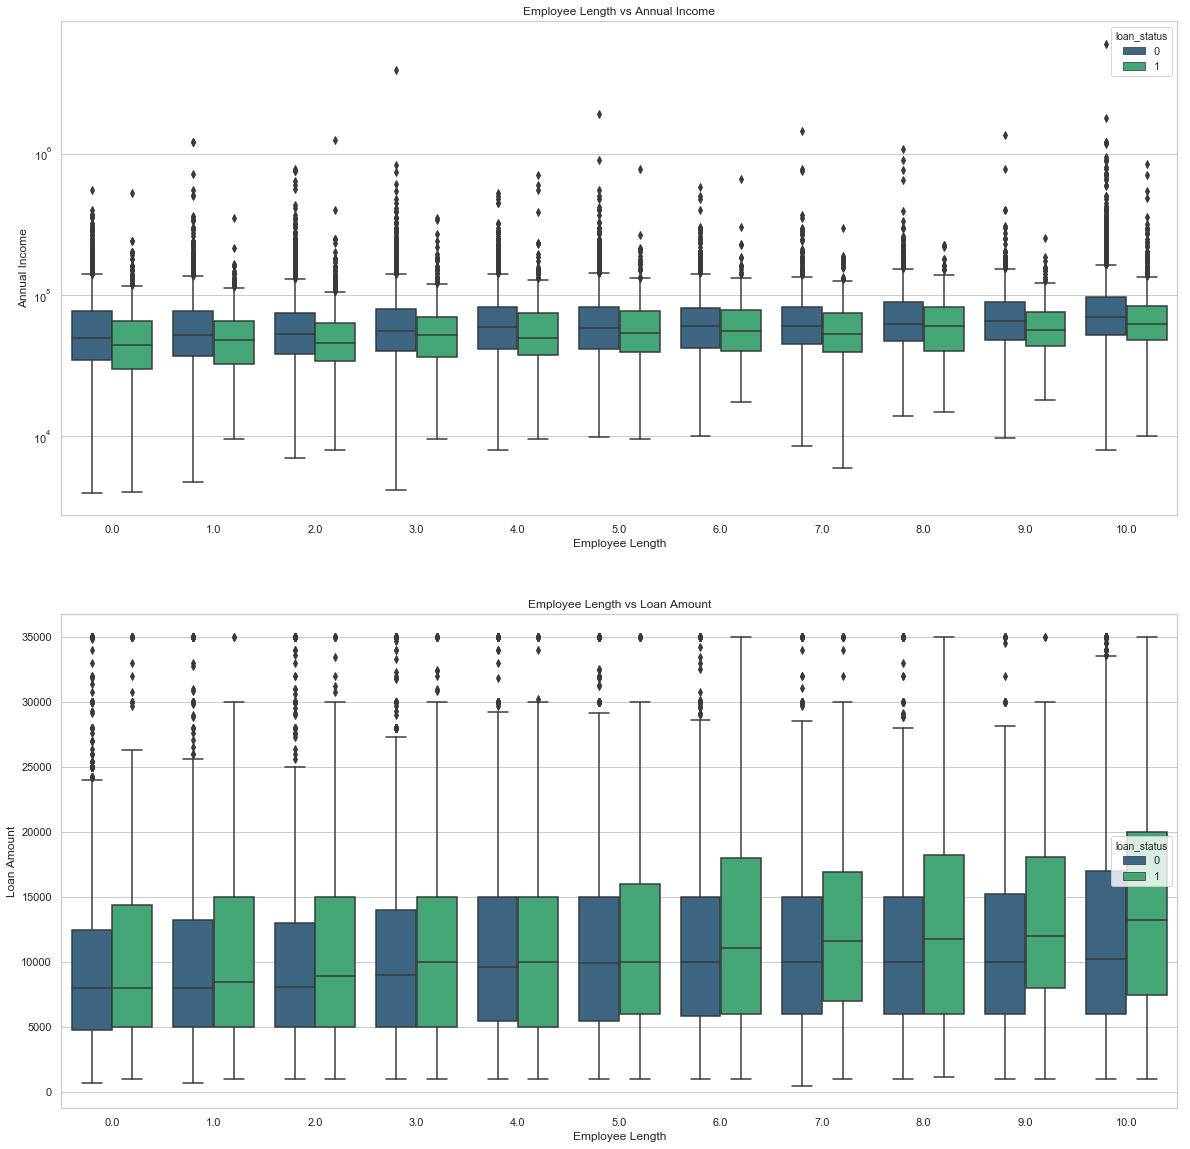

In [80]:
#Annual income and Employee length with default rate
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('Employee Length vs Annual Income')
#Plotting the Grade vs Annual Income graph with estimator as Median since we have a lot of outliers in data
sns.boxplot(loan['emp_length'],loan['annual_inc'],hue=loan['loan_status'],order=loan['emp_length'].sort_values().unique(),palette='viridis')
plt.yscale('log')
labels('Employee Length','Annual Income')

#Loan Amount and Employee Length with default rate
plt.subplot(2,1,2)
plt.title('Employee Length vs Loan Amount')
sns.boxplot(loan['emp_length'],loan['loan_amnt'],hue=loan['loan_status'],order=loan['emp_length'].sort_values().unique(),palette='viridis')
labels('Employee Length','Loan Amount')

annual_inc      Very Low                                                 \
emp_length           0.0        1.0         2.0         3.0         4.0   
Total Loans   494.000000  234.00000  334.000000  225.000000  170.000000   
Default Rate  20.040486   20.08547   16.467066   19.111111   17.647059    

annual_inc                                                           \
emp_length           5.0        6.0        7.0        8.0       9.0   
Total Loans   127.000000  70.000000  42.000000  27.000000  23.00000   
Default Rate  20.472441   15.714286  19.047619  22.222222  21.73913   

annual_inc                        Low                                         \
emp_length          10.0          0.0          1.0          2.0          3.0   
Total Loans   123.000000  1415.000000  1022.000000  1342.000000  1153.000000   
Default Rate  20.325203   15.759717    16.438356    16.542474    15.871639     

annual_inc                                                              \
emp_length           4.0         5.0        6.0        7.0         8.0   
Total Loans   926.000000  877.000000  582.00000  419.00000  319.000000   
Default Rate  17.170626   15.393387   15.80756   20.52506   17.868339    

annual_inc                                 Medium                            \
emp_length           9.0         10.0         0.0          1.0          2.0   
Total Loans   257.000000  1348.000000  1378.00000  1084.000000  1553.000000   
Default Rate  14.785992   18.991098    12.98984    14.114391    12.105602     

annual_inc                                                                   \
emp_length            3.0          4.0          5.0         6.0         7.0   
Total Loans   1542.000000  1270.000000  1233.000000  851.000000  744.000000   
Default Rate  13.748379    12.362205    14.517437    13.748531   13.844086    

annual_inc                                               High             \
emp_length           8.0         9.0         10.0         0.0        1.0   
Total Loans   588.000000  518.000000  3512.000000  883.000000  619.00000   
Default Rate  13.265306   14.285714   17.482916    10.305776   10.82391    

annual_inc                                                                \
emp_length           2.0         3.0         4.0         5.0         6.0   
Total Loans   798.000000  846.000000  793.000000  777.000000  543.000000   
Default Rate  9.022556    10.874704   10.844893   12.483912   12.891344    

annual_inc                                                      Very High  \
emp_length           7.0         8.0         9.0         10.0         0.0   
Total Loans   417.000000  387.000000  343.000000  2796.000000  171.000000   
Default Rate  11.990408   12.919897   9.329446    12.446352    11.695906    

annual_inc                                                               \
emp_length           1.0         2.0        3.0         4.0         5.0   
Total Loans   118.000000  180.000000  185.00000  138.000000  147.000000   
Default Rate  5.932203    10.555556   10.27027   13.043478   11.564626    

annual_inc                                                          
emp_length          6.0       7.0       8.0        9.0        10.0  
Total Loans   90.000000  67.00000  89.00000  68.000000  590.000000  
Default Rate  12.222222  16.41791  10.11236  10.294118  10.169492

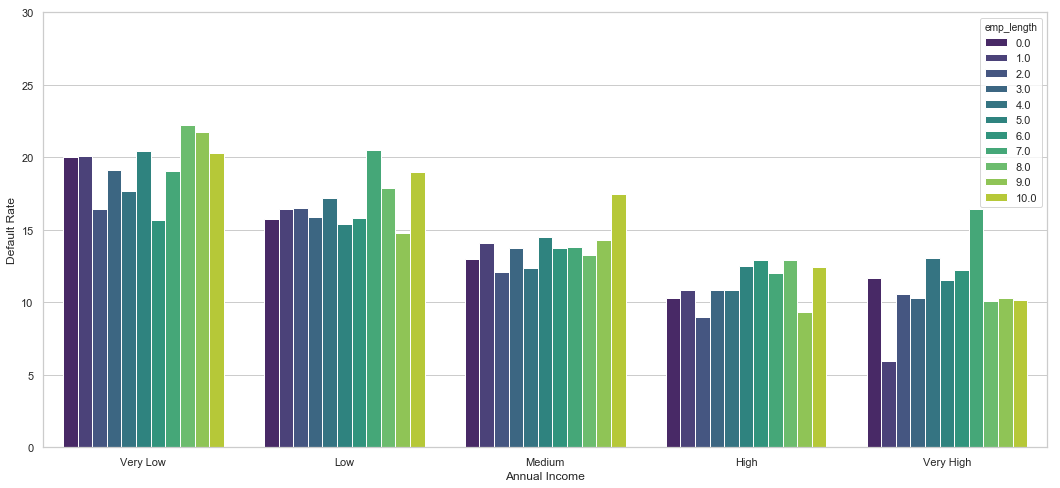

In [81]:
#Checking the Emp length w.r.t to Annual income and Default Rate
sns.set(style="whitegrid")
df=loan.pivot_table(values='dti',index=[annual_income_bins,'emp_length'],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = df[1]/df[0] *100
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(18,8))
ax=sns.barplot('annual_inc','Default Rate',hue='emp_length',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,30)
plt.xlabel('Annual Income')
df.T

We can see that the Default rate ia high for lower income groups, as we move towards higher income group, default rate is less. 
Loan risk w.r.t to income group is mentioned below:
1. Very Low income group - Risk is high for any experience level.
2. Low income group - Risk is moderate/high for all experience level.
3. Medium income group - RIsk is high if experience is more than 10 years.
4. High and above income groups are relatively at lower risk due to Employee length

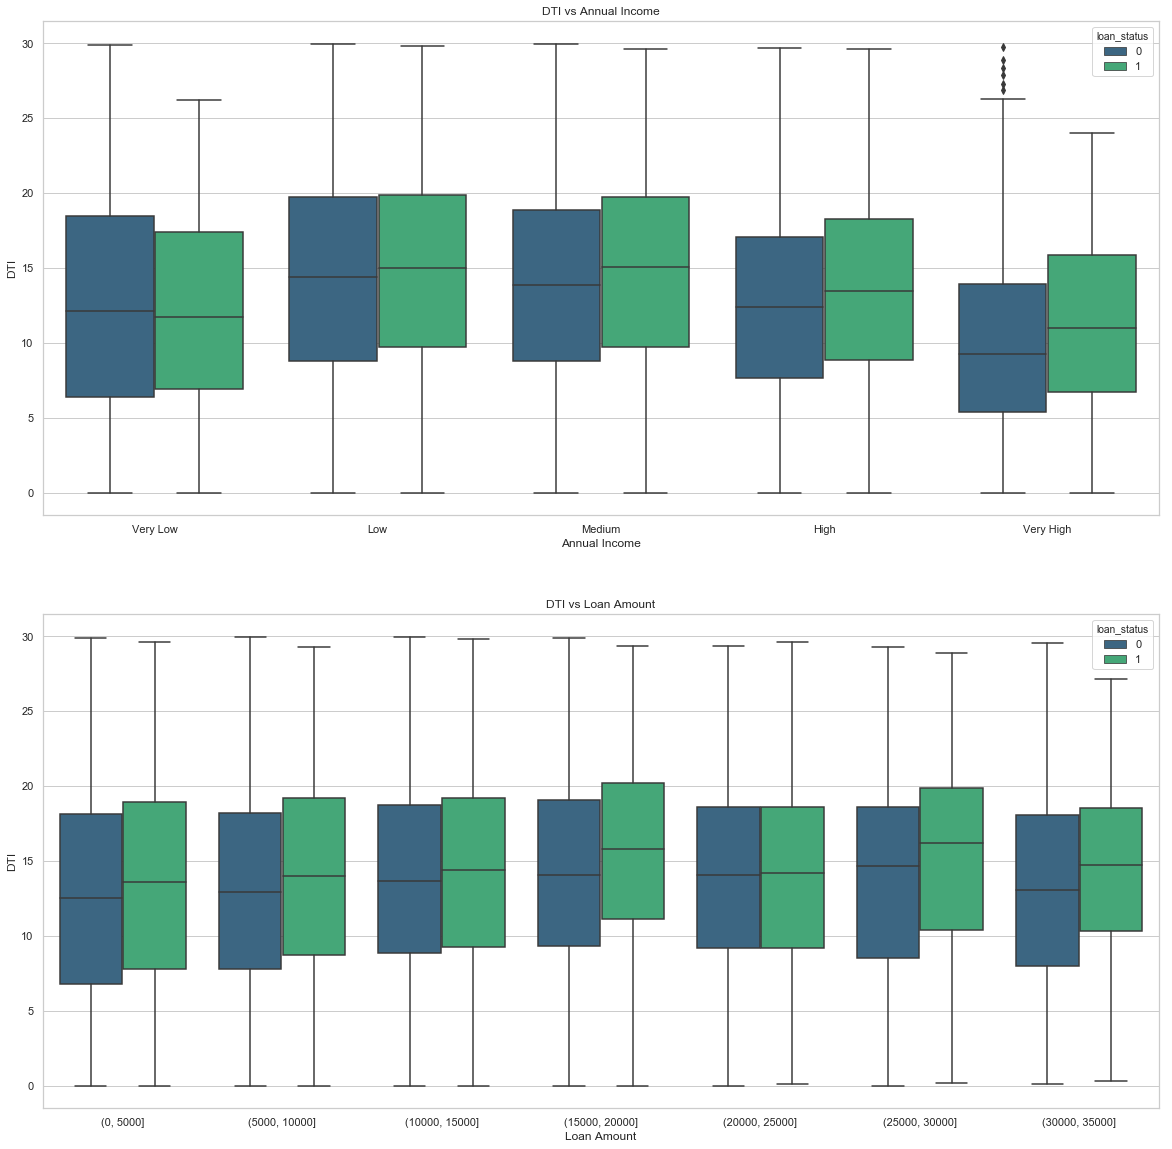

In [82]:
#Annual income and DTI with default rate
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('DTI vs Annual Income')
#Plotting the Grade vs Annual Income graph with estimator as Median since we have a lot of outliers in data
sns.boxplot(annual_income_bins,loan['dti'],hue=loan['loan_status'],palette='viridis')
labels('Annual Income','DTI')

#Loan Amount and DTI with default rate
plt.subplot(2,1,2)
plt.title('DTI vs Loan Amount')
sns.boxplot(loan_amount_bins,loan['dti'],hue=loan['loan_status'],palette='viridis')
labels('Loan Amount','DTI')

annual_inc      Very Low                                                 \
dti               (0, 5]    (5, 10]    (10, 15]    (15, 20]    (20, 25]   
Total Loans   312.000000  407.00000  415.000000  357.000000  312.000000   
Default Rate  16.987179   19.90172   22.891566   14.845938   18.269231    

annual_inc                       Low                                         \
dti            (25, 30]       (0, 5]      (5, 10]     (10, 15]     (15, 20]   
Total Loans   27.000000  1111.000000  1655.000000  2271.000000  2277.000000   
Default Rate  14.814815  14.311431    15.649547    17.173052    18.269653     

annual_inc                                  Medium                            \
dti              (20, 25]    (25, 30]       (0, 5]      (5, 10]     (10, 15]   
Total Loans   2103.000000  201.000000  1556.000000  2648.000000  3628.000000   
Default Rate  17.213505    13.930348   12.467866    12.273414    13.781698     

annual_inc                                                 High               \
dti              (15, 20]     (20, 25]    (25, 30]       (0, 5]      (5, 10]   
Total Loans   3557.000000  2586.000000  258.000000  1194.000000  2197.000000   
Default Rate  15.462468    17.401392    12.015504   9.966499     9.740555      

annual_inc                                                      Very High  \
dti              (10, 15]     (15, 20]    (20, 25]    (25, 30]     (0, 5]   
Total Loans   2472.000000  1997.000000  1215.00000  102.000000  399.00000   
Default Rate  11.529126    12.518778    13.82716    15.686275   8.02005     

annual_inc                                                             
dti              (5, 10]    (10, 15]    (15, 20]    (20, 25] (25, 30]  
Total Loans   589.000000  452.000000  273.000000  116.000000 NaN       
Default Rate  9.847199    11.283186   15.384615   12.068966  NaN

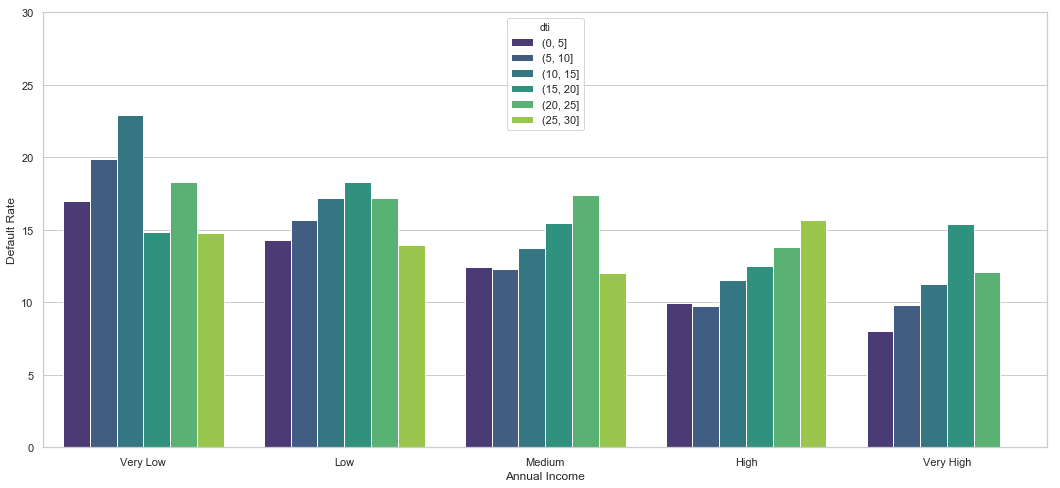

In [95]:
#Checking the dti w.r.t to Annual income and Default Rate
df=loan.pivot_table(values='dti',index=[annual_income_bins,dti_bins],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = df[1]/df[0] *100
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(18,8))
ax=sns.barplot('annual_inc','Default Rate',hue='dti',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,30)
plt.xlabel('Annual Income')

df.T

We can see that the dti is high for lower income groups, as we move towards higher income group, dti is less. 
Loan risk w.r.t to income group is mentioned below:
1. Very Low income group - High risk for any DTI value
2. Low income group - High risk if DTI is greater than 10
3. Medium income group - High risk for DTI above 20
4. High and above income groups are relatively at lower risk due to DTI

loan_amnt       (0, 5000]                                                      \
dti                (0, 5]      (5, 10]     (10, 15]     (15, 20]     (20, 25]   
Total Loans   1487.000000  1815.000000  2058.000000  1867.000000  1457.000000   
Default Rate  11.903161    12.176309    13.168124    14.783074    15.579959     

loan_amnt                (5000, 10000]                                        \
dti             (25, 30]        (0, 5]      (5, 10]     (10, 15]    (15, 20]   
Total Loans   113.000000  1611.000000   2586.000000  3010.000000  2698.00000   
Default Rate  7.964602    11.235258     10.556845    13.056478    13.52854     

loan_amnt                             (10000, 15000]               \
dti              (20, 25]    (25, 30]         (0, 5]      (5, 10]   
Total Loans   2048.000000  184.000000  725.000000     1505.000000   
Default Rate  14.697266    11.413043   12.137931      12.624585     

loan_amnt                                                        \
dti              (10, 15]     (15, 20]     (20, 25]    (25, 30]   
Total Loans   1960.000000  1807.000000  1304.000000  117.000000   
Default Rate  13.061224    13.945766    14.953988    12.820513    

loan_amnt    (15000, 20000]                                                    \
dti                  (0, 5]     (5, 10]     (10, 15]     (15, 20]    (20, 25]   
Total Loans   338.000000     768.000000  1136.000000  1037.000000  822.000000   
Default Rate  12.426036      12.630208   17.165493    18.804243    21.411192    

loan_amnt               (20000, 25000]                                     \
dti            (25, 30]         (0, 5]    (5, 10]    (10, 15]    (15, 20]   
Total Loans   89.000000  261.000000     534.00000  745.000000  687.000000   
Default Rate  15.730337  18.390805      19.28839   17.583893   18.340611    

loan_amnt                           (25000, 30000]                          \
dti             (20, 25]   (25, 30]         (0, 5]     (5, 10]    (10, 15]   
Total Loans   468.000000  47.000000  69.000000      139.000000  136.000000   
Default Rate  19.871795   19.148936  11.594203      17.985612   20.588235    

loan_amnt                                       (30000, 35000]              \
dti             (15, 20]    (20, 25]   (25, 30]         (0, 5]     (5, 10]   
Total Loans   201.000000  118.000000  28.000000  81.000000      149.000000   
Default Rate  22.885572   25.423729   17.857143  16.049383      18.791946    

loan_amnt                                                    
dti             (10, 15]    (15, 20]    (20, 25]   (25, 30]  
Total Loans   193.000000  164.000000  115.000000  18.000000  
Default Rate  24.352332   31.097561   25.217391   33.333333

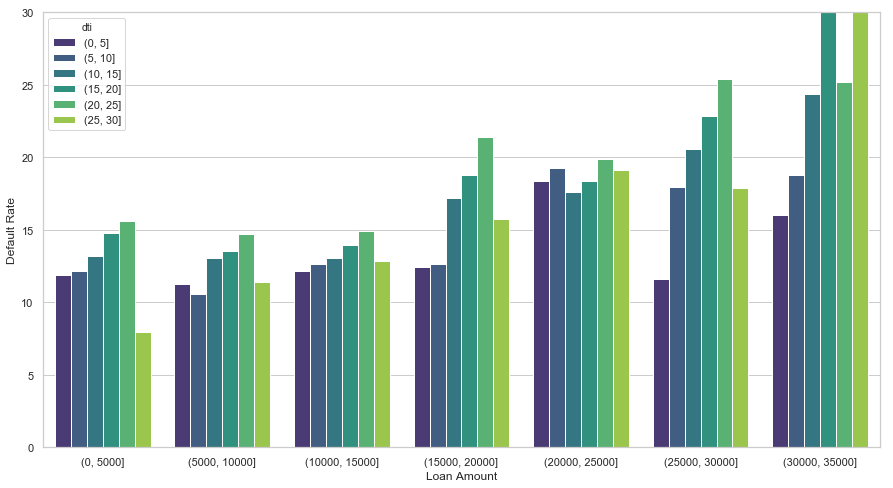

In [96]:
#Checking the dti w.r.t to Annual income and Default Rate
df=loan.pivot_table(values='dti',index=[loan_amount_bins,dti_bins],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = df[1]/df[0] *100
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(15,8))
ax=sns.barplot('loan_amnt','Default Rate',hue='dti',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,30)
plt.xlabel('Loan Amount')

df.T

For loan amount higher than 15000 and dti greater than 10, then defaault rate is very high. We should advise the client to avoid loans with amount greater than 15k and dti higher than 10.

annual_inc              Very Low                                      Low  \
verification_status Not Verified Source Verified    Verified Not Verified   
Total Loans          959.0000     577.000000      333.000000  4974.000000   
Default Rate         18.1439      17.677643       23.723724   14.435062     

annual_inc                                             Medium                  \
verification_status Source Verified     Verified Not Verified Source Verified   
Total Loans          2719.000000     1967.000000  6193.000000  3650.000000      
Default Rate         17.616771       21.453991    11.868238    14.630137        

annual_inc                              High                               \
verification_status    Verified Not Verified Source Verified     Verified   
Total Loans          4430.00000  3090.000000  2039.000000     4073.000000   
Default Rate         17.72009    8.608414     10.838646       13.945495     

annual_inc             Very High                              
verification_status Not Verified Source Verified    Verified  
Total Loans          366.000000   509.000000      968.000000  
Default Rate         10.382514    11.787819       10.330579

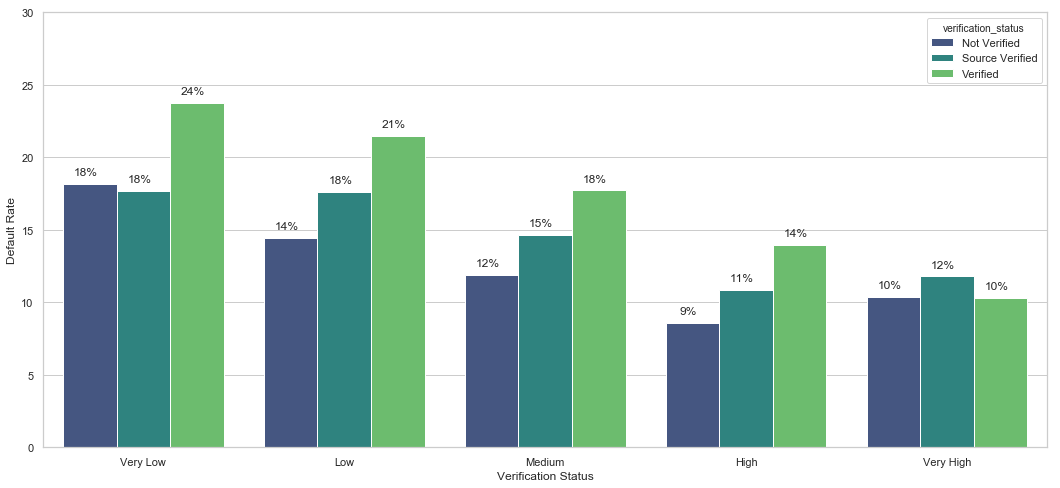

In [85]:
#Checking the Verification Status w.r.t to Annual income and Default Rate
df=loan.pivot_table(values='dti',index=[annual_income_bins,'verification_status'],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = df[1]/df[0] *100
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(18,8))
ax=sns.barplot('annual_inc','Default Rate',hue='verification_status',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,30)
plt.xlabel('Verification Status')
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0%}'.format(height/100), (x+width/2-0.02, y + height+0.6),ha='center')
        
df.T

We can see that the dti is high for lower income groups, as we move towards higher income group, dti is less. 
Loan risk w.r.t to income group is mentioned below:
1. Very Low income group - High risk for any Verification status
2. Low income group - High risk if Verification Status is 'Source Verified' or 'Verified'
3. Medium income group - High risk is source is 'Verified'
4. High and above income groups are relatively at lower risk due to Verification Status

annual_inc        Very Low                                      Low  \
home_ownership    MORTGAGE OTHER         OWN        RENT   MORTGAGE   
Total Loans     182.000000 NaN    303.000000  1379.00000  2571.0000   
Default Rate    18.131868  NaN    14.851485   20.08702    16.8028     

annual_inc                                               Medium             \
home_ownership      OTHER         OWN         RENT     MORTGAGE      OTHER   
Total Loans     28.000000  892.000000  6169.000000  6484.000000  36.000000   
Default Rate    21.428571  15.358744   16.923326    14.589759    22.222222   

annual_inc                                      High                    \
home_ownership         OWN         RENT     MORTGAGE OTHER         OWN   
Total Loans     915.000000  6838.000000  5822.000000  24.0  479.000000   
Default Rate    14.972678   14.083065    11.387839    12.5  12.734864    

annual_inc                     Very High                                
home_ownership         RENT     MORTGAGE OTHER         OWN        RENT  
Total Loans     2877.000000  1284.000000  5.0   119.000000  435.000000  
Default Rate    11.400765    9.735202     20.0  5.882353    14.942529

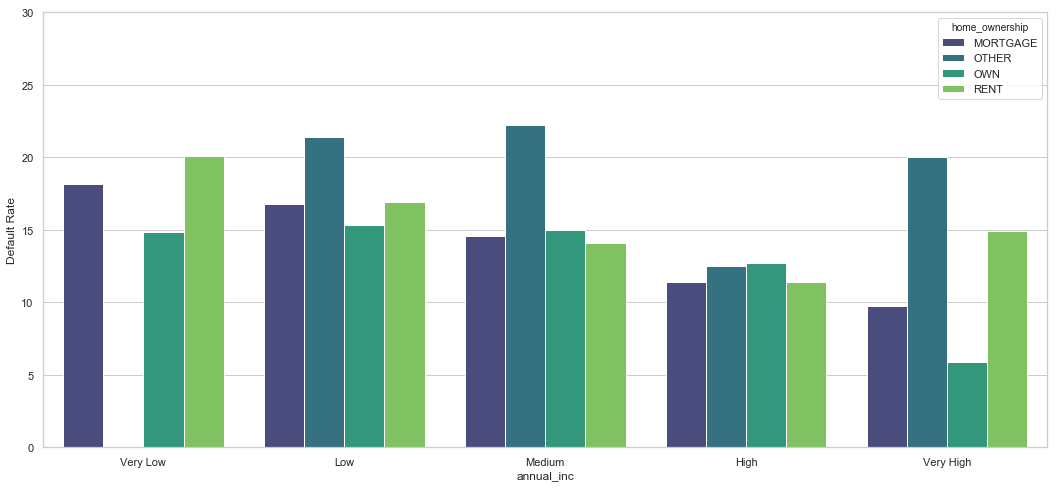

In [86]:
#Checking the Home Ownership w.r.t to Annual income and Default Rate
df=loan.pivot_table(values='dti',index=[annual_income_bins,'home_ownership'],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = df[1]/df[0] *100
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(18,8))
ax=sns.barplot('annual_inc','Default Rate',hue='home_ownership',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,30)
# for p in ax.patches:
#         width, height = p.get_width(), p.get_height()
#         x, y = p.get_xy() 
#         ax.annotate('{:.0%}'.format(height/100), (x+width/2-0.02, y + height+0.6),ha='center')
        
df.T

Here also, people with Low and Very Low income group are more likely to deault but with rising income, the chances of default decreases.

int_rate     (5.0, 7.5]                                                \
dti              (0, 5]      (5, 10] (10, 15]    (15, 20]    (20, 25]   
Total Loans   891.00000  1226.000000  1250.00  904.000000  577.000000   
Default Rate  3.59147    3.507341     4.72     4.867257    6.239168     

int_rate                  (7.5, 10.0]                                         \
dti             (25, 30]       (0, 5]      (5, 10]     (10, 15]     (15, 20]   
Total Loans   205.000000  1006.000000  1489.000000  1558.000000  1326.000000   
Default Rate  6.829268    6.361829     7.387508     6.803594     9.954751      

int_rate                            (10.0, 12.5]                            \
dti             (20, 25]   (25, 30]       (0, 5]      (5, 10]     (10, 15]   
Total Loans   909.000000  143.00000  1048.000000  1777.000000  2246.000000   
Default Rate  8.360836    10.48951   14.217557    11.311199    11.843277     

int_rate                                        (12.5, 15.0]               \
dti              (15, 20]     (20, 25] (25, 30]       (0, 5]      (5, 10]   
Total Loans   2115.000000  1540.000000  125.0    889.000000   1569.000000   
Default Rate  13.333333    13.571429    16.8     14.735658    14.786488     

int_rate                                                      (15.0, 17.5]  \
dti              (10, 15]    (15, 20]     (20, 25]   (25, 30]       (0, 5]   
Total Loans   2222.000000  2100.00000  1697.000000  97.000000  493.000000    
Default Rate  16.111611    15.47619    18.149676    22.680412  21.298174     

int_rate                                                                    \
dti              (5, 10]     (10, 15]     (15, 20]     (20, 25]   (25, 30]   
Total Loans   926.000000  1237.000000  1260.000000  1032.000000  23.000000   
Default Rate  22.462203   23.686338    22.539683    22.868217    30.434783   

int_rate     (17.5, 20.0]                                                 \
dti                (0, 5]     (5, 10]   (10, 15]    (15, 20]    (20, 25]   
Total Loans   182.000000   363.000000  554.00000  535.000000  420.000000   
Default Rate  27.472527    24.793388   30.32491   29.719626   31.190476    

int_rate              (20.0, 22.5]                                      \
dti          (25, 30]       (0, 5]     (5, 10]    (10, 15]    (15, 20]   
Total Loans  NaN       61.000000    131.000000  162.000000  197.000000   
Default Rate NaN       40.983607    35.877863   41.358025   37.563452    

int_rate                 (22.5, 25.0]                                           
dti             (20, 25]       (0, 5] (5, 10]   (10, 15]   (15, 20]   (20, 25]  
Total Loans   142.000000  2.0          15.0    9.000000   24.000000  15.000000  
Default Rate  33.098592   50.0         40.0    44.444444  45.833333  53.333333

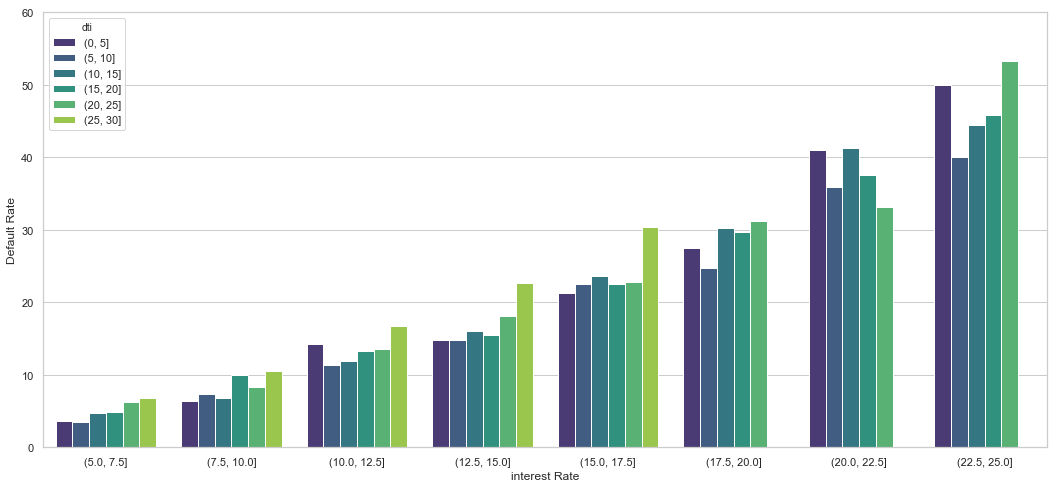

In [98]:
#Checking the DTI w.r.t to Interest Rate and Default Rate
df=loan.pivot_table(values='dti',index=[int_rate_bins,dti_bins],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = df[1]/df[0] *100
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(18,8))
ax=sns.barplot('int_rate','Default Rate',hue='dti',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,60)
plt.xlabel("interest Rate")
df.T

We can clearly see that if int rate is high, default rate goes up. Even for interest greater than 12.5 and DTI greater than 20, we can see that the default rate is very high.

annual_inc      Very Low                                             \
purpose              car credit_card debt_consolidation educational   
Total Loans   102.000000  170.000000  714.000000         60.000000    
Default Rate  14.705882   9.411765    20.448179          16.666667    

annual_inc                                                                \
purpose      home_improvement house major_purchase    medical     moving   
Total Loans   72.0             10.0  166.00000      38.000000  65.000000   
Default Rate  12.5             20.0  17.46988       26.315789  18.461538   

annual_inc                                                                    \
purpose            other renewable_energy small_business vacation    wedding   
Total Loans   332.000000  12.0             74.00000       25.0     29.000000   
Default Rate  21.686747   25.0             29.72973       20.0     13.793103   

annual_inc           Low                                              \
purpose              car  credit_card debt_consolidation educational   
Total Loans   397.000000  1164.000000  4684.000000        101.000000   
Default Rate  13.602015   13.487973    17.228864          18.811881    

annual_inc                                                           \
purpose      home_improvement      house major_purchase     medical   
Total Loans   483.000000       87.000000  598.000000     192.000000   
Default Rate  15.113872        20.689655  12.374582      14.583333    

annual_inc                                                             \
purpose           moving        other renewable_energy small_business   
Total Loans   169.000000  1075.000000  23.000000        357.000000      
Default Rate  20.118343   18.139535    30.434783        30.532213       

annual_inc                                Medium               \
purpose         vacation     wedding         car  credit_card   
Total Loans   107.000000  223.000000  563.000000  1899.000000   
Default Rate  17.757009   11.210762   9.236234    10.373881     

annual_inc                                                              \
purpose      debt_consolidation educational home_improvement     house   
Total Loans   7065.000000        76.000000   930.000000       128.0000   
Default Rate  15.130927          13.157895   13.763441        14.0625    

annual_inc                                                        \
purpose      major_purchase     medical      moving        other   
Total Loans   737.000000     238.000000  180.000000  1282.000000   
Default Rate  9.769335       17.647059   11.666667   14.898596     

annual_inc                                                            \
purpose      renewable_energy small_business    vacation     wedding   
Total Loans   22.000000        628.000000     124.000000  401.000000   
Default Rate  13.636364        30.573248      16.129032   9.725686     

annual_inc          High                                              \
purpose              car  credit_card debt_consolidation educational   
Total Loans   323.000000  1335.000000  4189.000000        50.0         
Default Rate  9.287926    8.314607     12.389592          18.0         

annual_inc                                                           \
purpose      home_improvement      house major_purchase     medical   
Total Loans   949.000000       96.000000  459.000000     143.000000   
Default Rate  9.167545         16.666667  5.882353       12.587413    

annual_inc                                                            \
purpose           moving       other renewable_energy small_business   
Total Loans   104.000000  760.000000  30.000000        476.000000      
Default Rate  11.538462   12.631579   13.333333        21.428571       

annual_inc                           Very High                                 \
purpose        vacation     wedding        car credit_card debt_consolidation   
Total Loans   76.000000  212.000000  46.000000  233.000000  732.000000       

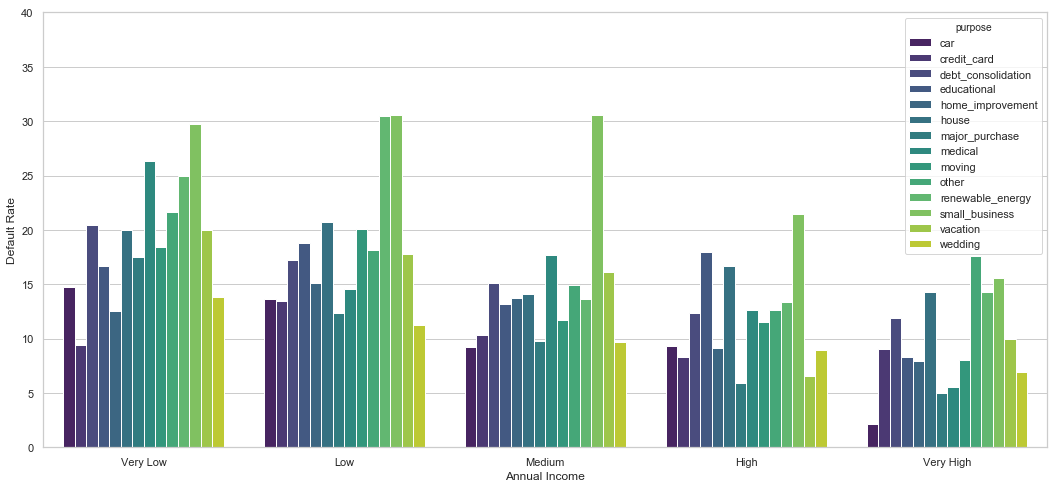

In [100]:
#Checking the Purpose w.r.t to Annual income and Default Rate
sns.set(style="whitegrid")
df=loan.pivot_table(values='dti',index=[annual_income_bins,'purpose'],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = df[1]/df[0] *100
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(18,8))
ax=sns.barplot('annual_inc','Default Rate',hue='purpose',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,40)
plt.xlabel('Annual Income')
df.T

We have analysed than Lower income groups are riskier, so we will not analyse them further
Lets see for higher income groups:
1. Medium income group : Loans are very risky if given for small business or Medical
2. HIgh income group : Loans are risky to give for small business.

loan_amnt      (0, 5000]                                             \
purpose              car credit_card debt_consolidation educational   
Total Loans   619.000000  810.000000  2666.000000        150.000000   
Default Rate  10.177706   8.024691    14.928732          12.666667    

loan_amnt                                                            \
purpose      home_improvement      house major_purchase     medical   
Total Loans   712.000000       62.000000  859.000000     272.000000   
Default Rate  10.533708        17.741935  8.963912       14.338235    

loan_amnt                                                            \
purpose          moving       other renewable_energy small_business   
Total Loans   311.00000  1604.00000  40.0             318.000000      
Default Rate  16.07717   17.01995    22.5             21.698113       

loan_amnt                            (5000, 10000]               \
purpose         vacation     wedding           car  credit_card   
Total Loans   208.000000  224.000000  606.000000    1681.000000   
Default Rate  13.461538   8.482143    9.570957      9.339679      

loan_amnt                                                                 \
purpose      debt_consolidation educational home_improvement       house   
Total Loans   5562.000000        97.000000   902.000000       113.000000   
Default Rate  13.214671          18.556701   11.419069        18.584071    

loan_amnt                                                         \
purpose      major_purchase     medical      moving        other   
Total Loans   754.00000      214.000000  153.000000  1146.000000   
Default Rate  9.28382        14.485981   14.379085   14.397906     

loan_amnt                                                          \
purpose      renewable_energy small_business vacation     wedding   
Total Loans   25.0             479.000000     100.0    370.000000   
Default Rate  16.0             22.546973      15.0     9.459459     

loan_amnt    (10000, 15000]                                              \
purpose                 car  credit_card debt_consolidation educational   
Total Loans   140.000000     1174.000000  4196.000000        32.00        
Default Rate  14.285714      10.221465    13.369876          18.75        

loan_amnt                                                                      \
purpose      home_improvement      house major_purchase    medical     moving   
Total Loans   488.00000        79.000000  217.000000     88.000000  38.000000   
Default Rate  11.47541         15.189873  11.520737      19.318182  7.894737    

loan_amnt                                                            \
purpose            other renewable_energy small_business   vacation   
Total Loans   461.000000  14.000000        334.000000     18.000000   
Default Rate  12.581345   14.285714        30.239521      16.666667   

loan_amnt                (15000, 20000]                                 \
purpose          wedding            car credit_card debt_consolidation   
Total Loans   156.000000  47.000000      608.000000  2531.000000         
Default Rate  8.974359    14.893617      12.993421   17.700514           

loan_amnt                                                            \
purpose      educational home_improvement      house major_purchase   
Total Loans   12.0        269.000000       33.000000  127.000000      
Default Rate  25.0        12.267658        9.090909   14.173228       

loan_amnt                                                                   \
purpose         medical moving       other renewable_energy small_business   
Total Loans   39.000000  16.0   199.000000  8.0              198.00000       
Default Rate  20.512821  12.5   21.105528   12.5             30.30303        

loan_amnt                          (20000, 25000]              \
purpose        vacation    wedding            car credit_card   
Total Loans   13.000000  98.000000  17.000000      376.000000   
Default Rate  30.769

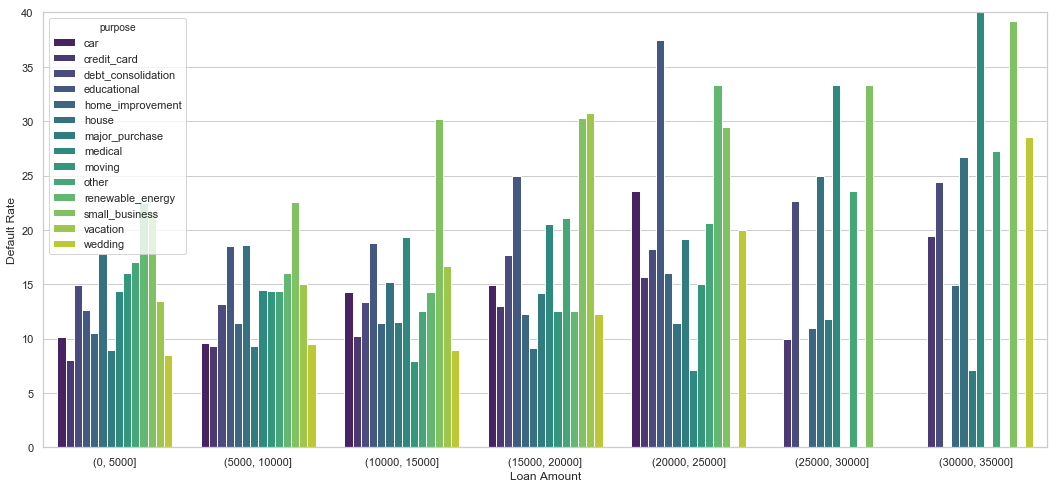

In [101]:
#Checking the purpose w.r.t to Annual income and Default Rate
sns.set(style="whitegrid")
df=loan.pivot_table(values='dti',index=[loan_amount_bins,'purpose'],columns='loan_status',aggfunc=len)
df[0]  = (df[1]+df[0])
df[1] = df[1]/df[0] *100
df.columns=['Total Loans','Default Rate']

plt.figure(figsize=(18,8))
ax=sns.barplot('loan_amnt','Default Rate',hue='purpose',data=df['Default Rate'].reset_index(),palette='viridis')
plt.ylim(0,40)
plt.xlabel('Loan Amount')

df.T

As the loan amount increases, the chances of default is high with most of the purposes. We can deduce the following from above graph:
1. Loan amount >10k - Purpose should not be small business,educational,medical
2. For loan amount >15k - Purpose should not be Debt consolidation, Other
3. For loan amount >20k - Purpose should not be Renewable enrgy
4. For loan amount >25k - Purpose should not be house, wedding

## Bivariate Analysis Observation:
#### Loan Amount vs Interest Rate
1. Interest rate higher than 15% - Default rate is high
2. Interest rate between 12.5-15% - Loan amount should not be greater than 15k
3. It is ok to give loans at rate below 12.5%

#### Annual Income vs Interest Rate
While it is ok to give loan with lower interest rate, below is our recommendation for interest rate and annual income:
1. Income less than 24k - Interest rate below 10%
2. Income less than 45k- Interest rate below 12.5 %
3. Income less than 76k- Interest rate below 15%

#### Annual Income vs Experience Level
1. Very Low income group - Risk is high for any experience level.
2. Low income group - Risk is moderate/high for all experience level.
3. Medium income group - RIsk is high if experience is more than 10 years.
4. High and above income groups are relatively at lower risk due to Employee length

#### Annual Income vs DTI
1. Very Low income group - High risk for any DTI value
2. Low income group - High risk if DTI is greater than 10
3. Medium income group - High risk for DTI above 20
4. High and above income groups are relatively at lower risk due to DTI

#### Loan Amount vs DTI
1. For loan amount higher than 15000 and dti greater than 10, then defaault rate is very high. 
2. We should advise the client to avoid loans with amount greater than 15k and dti higher than 10.

#### Annual Income vs Verification Status
1. Very Low income group - High risk for any Verification status
2. Low income group - High risk if Verification Status is 'Source Verified' or 'Verified'
3. Medium income group - High risk is source is 'Verified'
4. High and above income groups are relatively at lower risk due to Verification Status

#### Interest Rate and DTI
1. For interest greater than 12.5 and DTI greater than 20, the default rate is very high.

#### Annual Income vs Purpose
1. Medium income group : Loans are very risky if given for small business or Medical
2. HIgh income group : Loans are risky to give for small business

#### Loan Amount vs Purpose
1. Loan amount >10k - Purpose should not be small business,educational,medical
2. For loan amount >15k - Purpose should not be Debt consolidation, Other
3. For loan amount >20k - Purpose should not be Renewable enrgy
4. For loan amount >25k - Purpose should not be house, wedding


# Final Recommendations

1. If the annual income is lower to 76k, we should keep the loan amount less than 15k.
2. Loan should be given for smaller duration (3 years)
3. Interest rate should be lower than 12,5%, if high, then keep the loan amount below 15k.
4. Increase giving Loans with loan grade A,B and subgrades C1 and C2(apart from A1-A5,B1-B5).
5. Avoid giving loans with high Debt-to-income ratio(more than 20), if high, then decrease the loan amount<15k
6. Avoid giving loans if there are any derogatory public record or Bankruptcies
7. Avoid giving high loan amounts(>10-15k) for Small Business, Renewable enrgy and house.
8. Loan installment amount should be les than 1800.
9. Avoid loans where funding amount is less than loan amount.